In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (13,9)
plt.rcParams['font.size'] = 20
warnings.filterwarnings('ignore')

In [ ]:
binary_data = pd.read_csv('/content/drive/MyDrive/Dataset/detect_dataset.csv')
multi_data = pd.read_csv('/content/drive/MyDrive/Dataset/classData.csv')

In [ ]:
binary_data

,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431,NaN,NaN
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202,NaN,NaN
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251,NaN,NaN
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963,NaN,NaN
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11996,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598,NaN,NaN
11997,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407,NaN,NaN
11998,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104,NaN,NaN
11999,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690,NaN,NaN


In [ ]:
multi_data

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983
...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690


In [ ]:
binary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12001 entries, 0 to 12000
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Output (S)  12001 non-null  int64  
 1   Ia          12001 non-null  float64
 2   Ib          12001 non-null  float64
 3   Ic          12001 non-null  float64
 4   Va          12001 non-null  float64
 5   Vb          12001 non-null  float64
 6   Vc          12001 non-null  float64
 7   Unnamed: 7  0 non-null      float64
 8   Unnamed: 8  0 non-null      float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB


In [ ]:
binary_data.head()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431,NaN,NaN
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202,NaN,NaN
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251,NaN,NaN
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963,NaN,NaN
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050,NaN,NaN


In [ ]:
any(binary_data.isna().sum() > 0)

True

In [ ]:
multi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB


In [ ]:
multi_data.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


In [ ]:
any(multi_data.isna().sum() > 0)

False

Binary classification - Fault Detection

In [ ]:
binary_data.drop(binary_data.iloc[:,[7,8]], axis=1, inplace=True)

In [ ]:
print(f'Number of Samples: {binary_data.shape[0]}\nNumber of Features: {binary_data.shape[1]}')

Number of Samples: 12001
Number of Features: 7


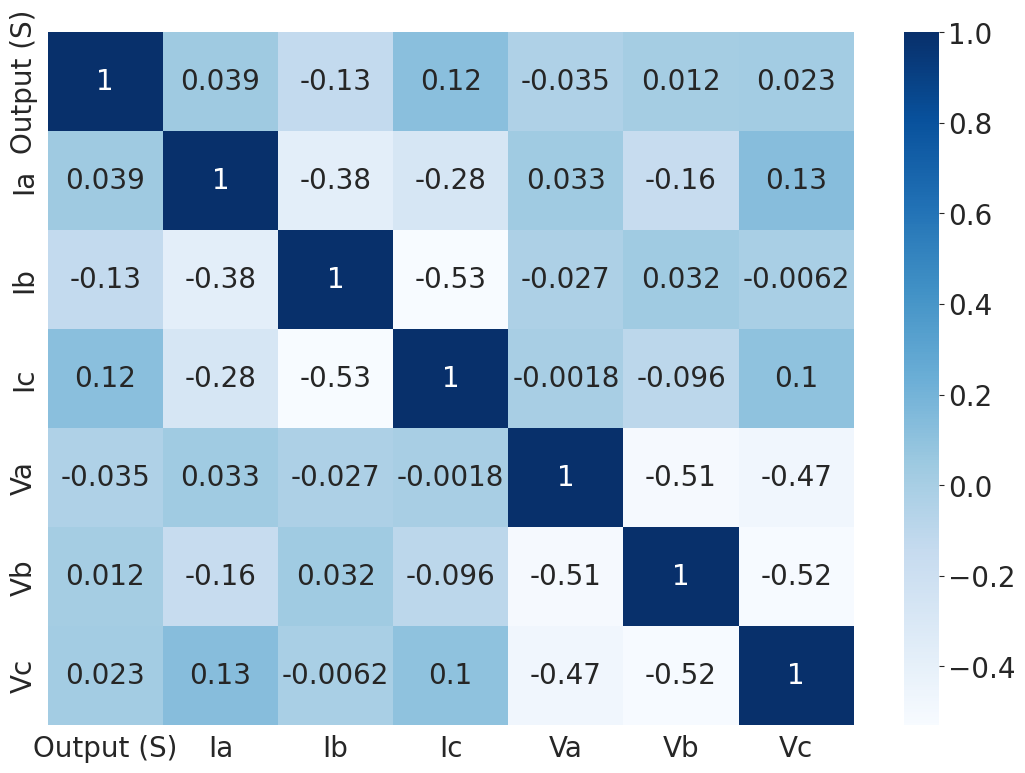

In [ ]:
sns.heatmap(binary_data.corr(), annot=True, cmap='Blues')
plt.show()

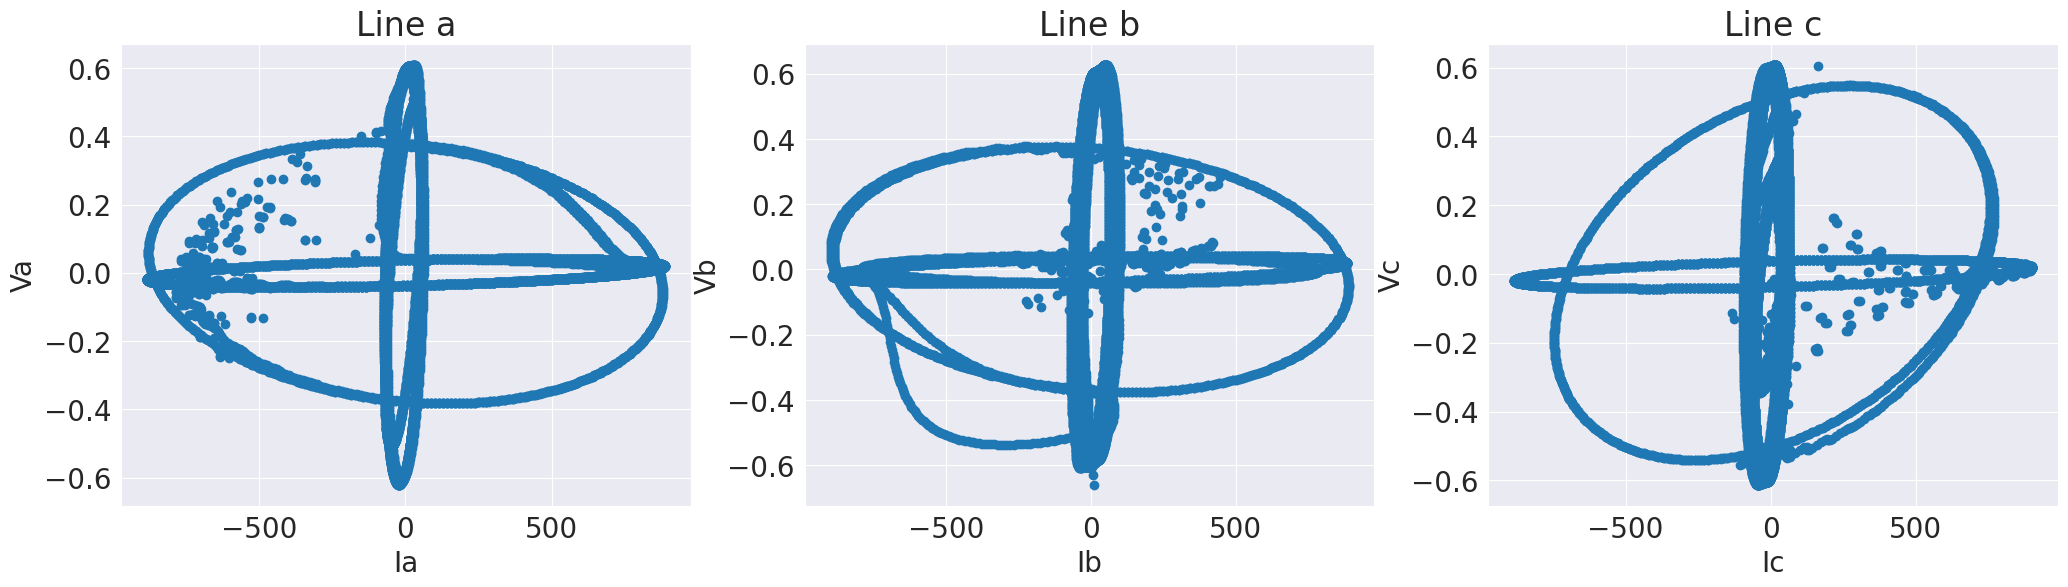

In [ ]:
plt.figure(figsize=(25,6))

a1 = plt.subplot2grid((1,3),(0,0))
a1.scatter(binary_data['Ia'], binary_data['Va'])
a1.set_title('Line a')
a1.set_xlabel('Ia')
a1.set_ylabel('Va')

a2 = plt.subplot2grid((1,3),(0,1))
a2.scatter(binary_data['Ib'], binary_data['Vb'])
a2.set_title('Line b')
a2.set_xlabel('Ib')
a2.set_ylabel('Vb')

a3 = plt.subplot2grid((1,3),(0,2))
a3.scatter(binary_data['Ic'], binary_data['Vc'])
a3.set_title('Line c')
a3.set_xlabel('Ic')
a3.set_ylabel('Vc')

plt.show()

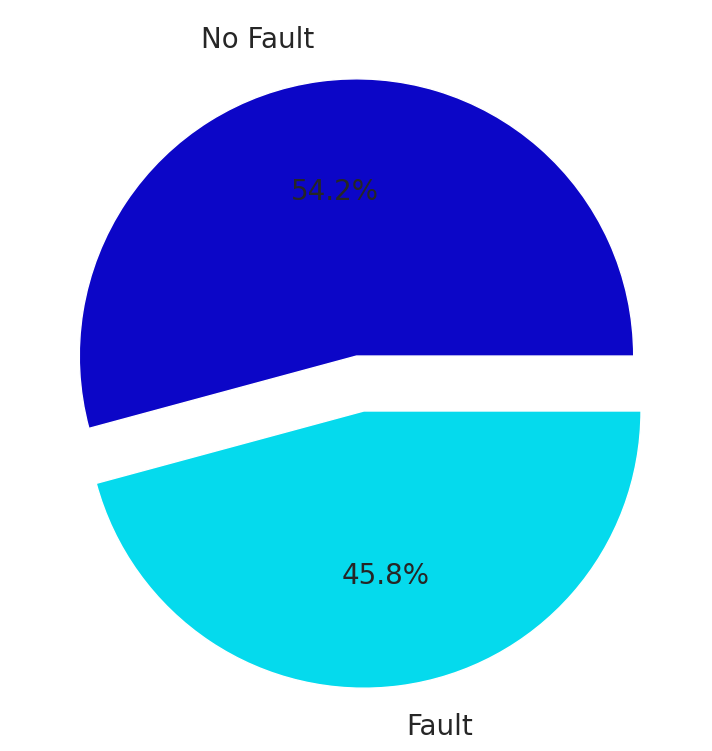

In [ ]:
plt.pie(x=binary_data['Output (S)'].value_counts(), labels=['No Fault', 'Fault'],
        explode = [0, 0.2], autopct= '%1.1f%%', labeldistance=1.15,
       colors=['#0c06c7', '#05daed'])
plt.show()


In [ ]:
def dist(cola,colb):

    fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(18,10))

    sns.distplot(binary_data[cola], label='Line Current', hist=True, color='#fc0328', ax=axs[0])
    sns.distplot(binary_data[colb], label='Line Voltage', hist=True, color='#0c06c7', ax=axs[1])

    axs[0].legend(loc='upper right', prop={'size': 12})
    axs[1].legend(loc='upper right', prop={'size': 12})

    plt.show()

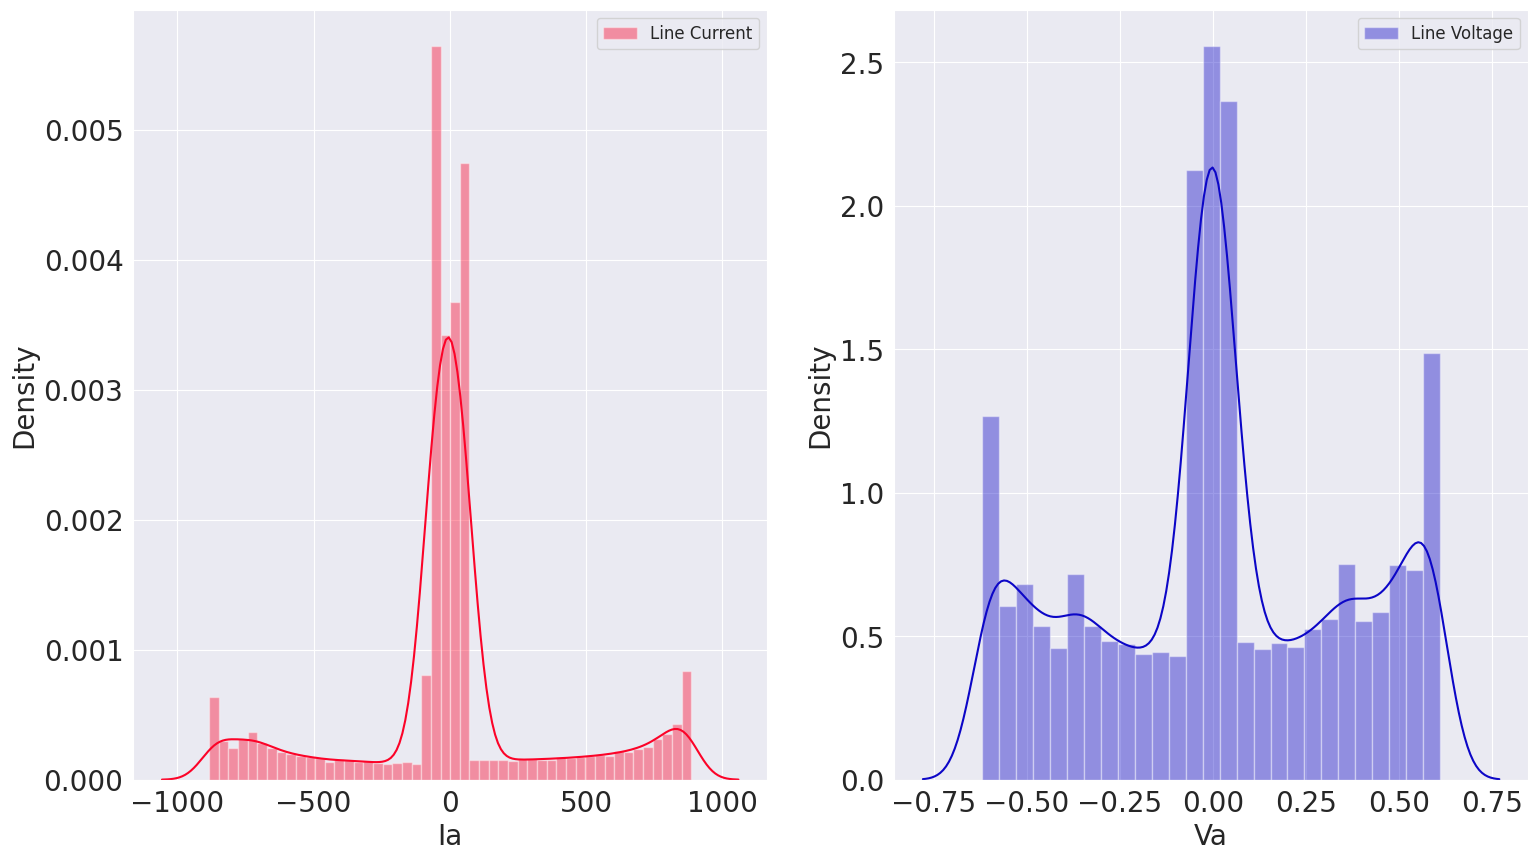

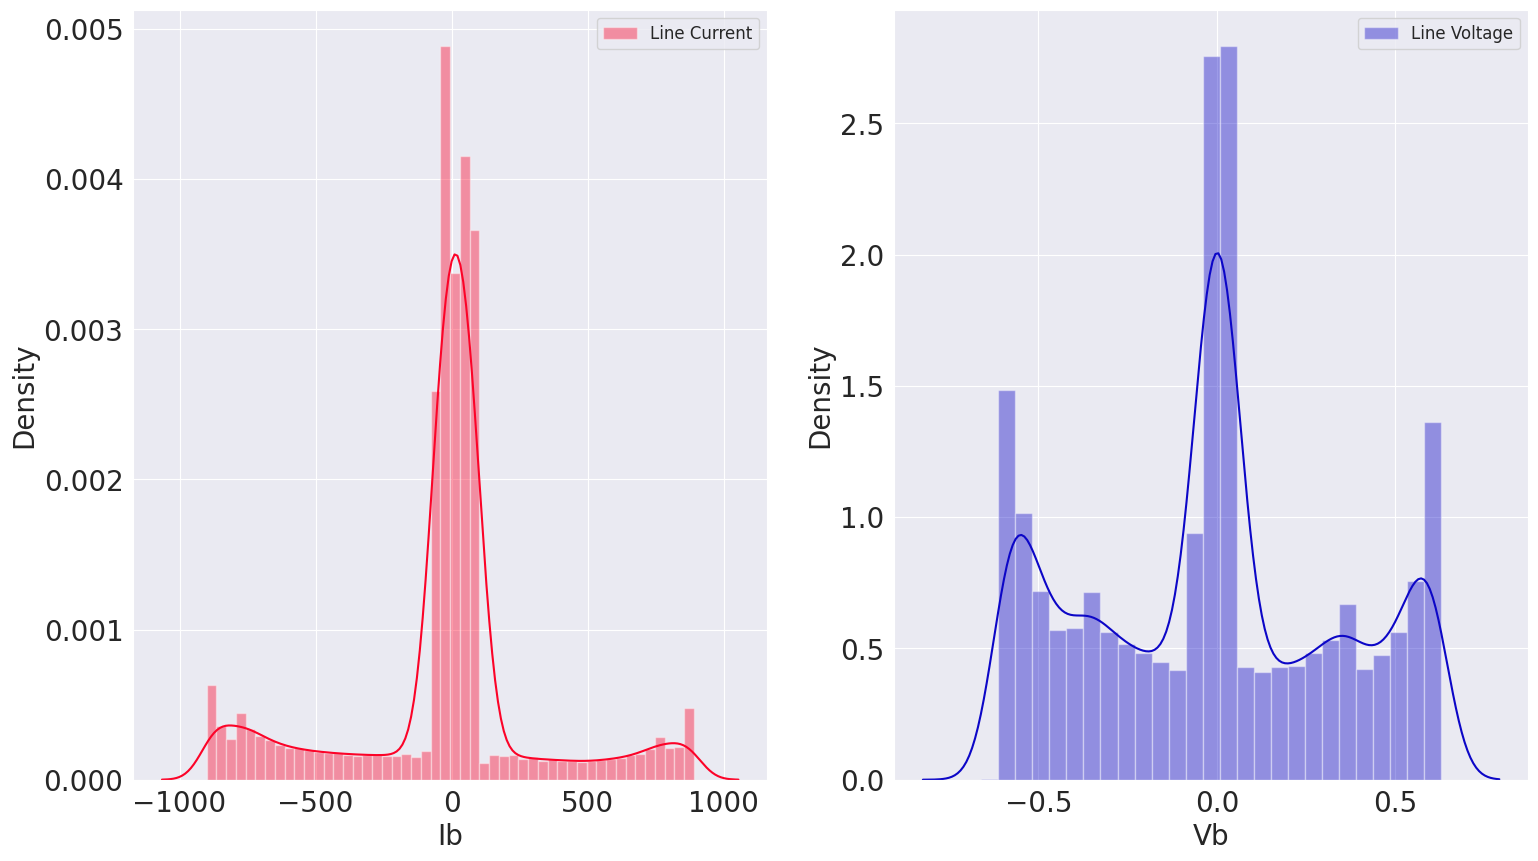

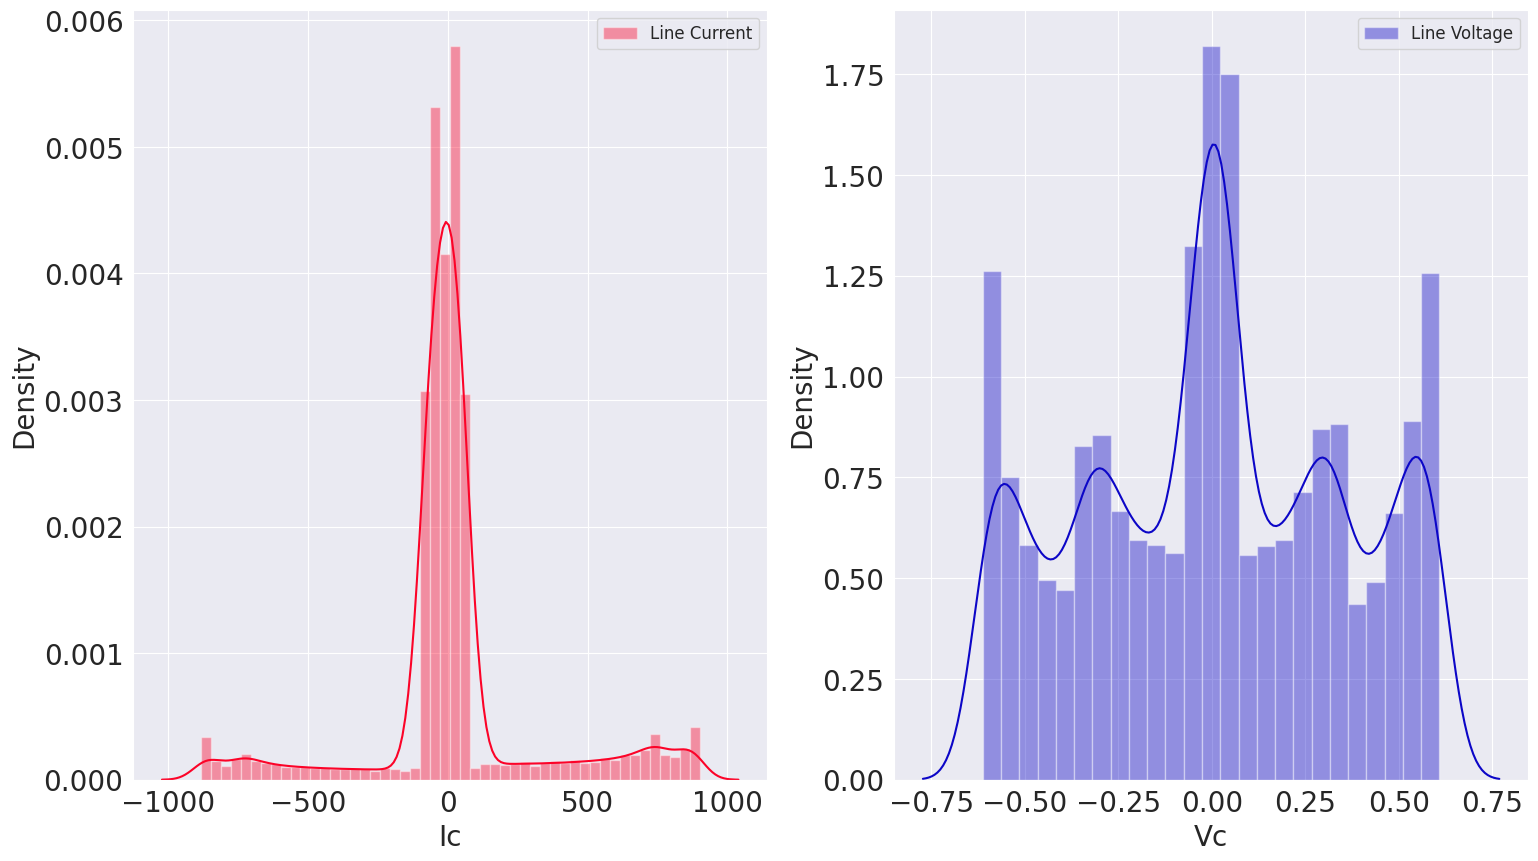

In [ ]:
lines = [
    ('Ia', 'Va'),
    ('Ib', 'Vb'),
    ('Ic', 'Vc')
]

for cola,colb in lines:
    dist(cola,colb)
    print('\n')


In [ ]:
y = binary_data.iloc[:,0]
X = binary_data.iloc[:,1:7]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9600, 6), (2401, 6), (9600,), (2401,))

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize individual classifiers
rf_classifier = RandomForestClassifier()
svm_classifier = SVC(probability=True)  # Set probability=True for SVM to enable soft voting

# Create a soft voting classifier
voting_classifier = VotingClassifier(estimators=[('rf', rf_classifier), ('svm', svm_classifier)], voting='soft')

# Train the voting classifier
voting_classifier.fit(X_train, y_train)

# Make predictions
y_pred = voting_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Compute precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9920866305705955
Precision: 0.997250229147571
Recall: 0.9855072463768116
F1-score: 0.9913439635535307


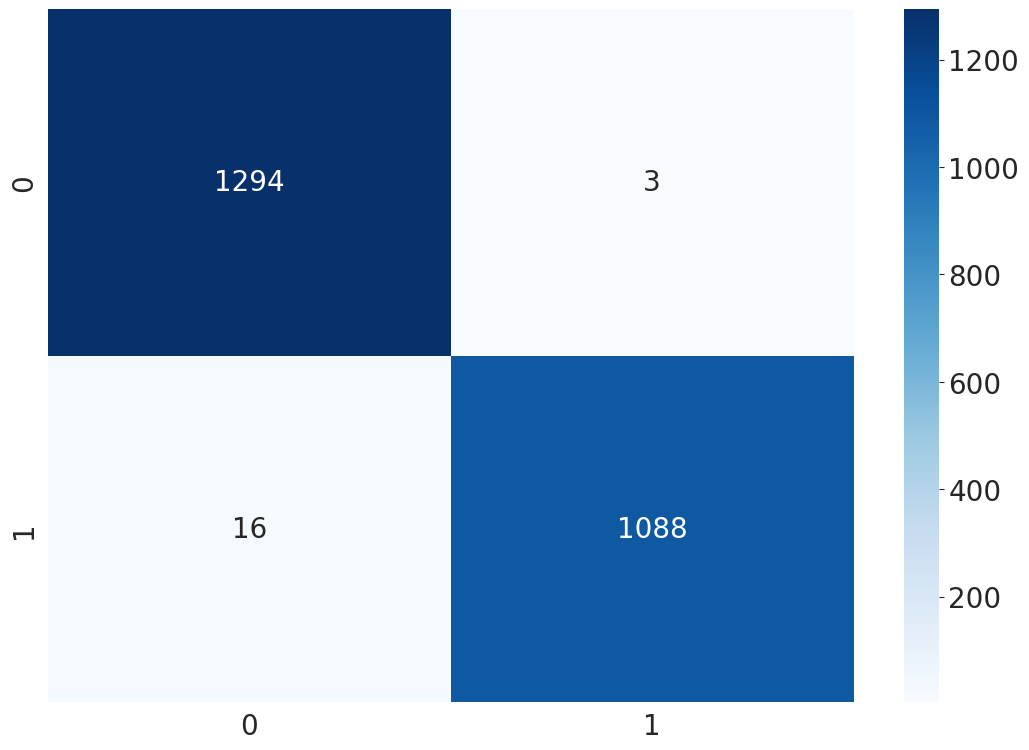

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='.4g')
plt.show()

In [ ]:
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1297
           1       1.00      0.99      0.99      1104

    accuracy                           0.99      2401
   macro avg       0.99      0.99      0.99      2401
weighted avg       0.99      0.99      0.99      2401



Multiclass Classification

In [ ]:
print(f'Number of Samples: {multi_data.shape[0]}\nNumber of Features: {multi_data.shape[1]}')

Number of Samples: 7861
Number of Features: 10


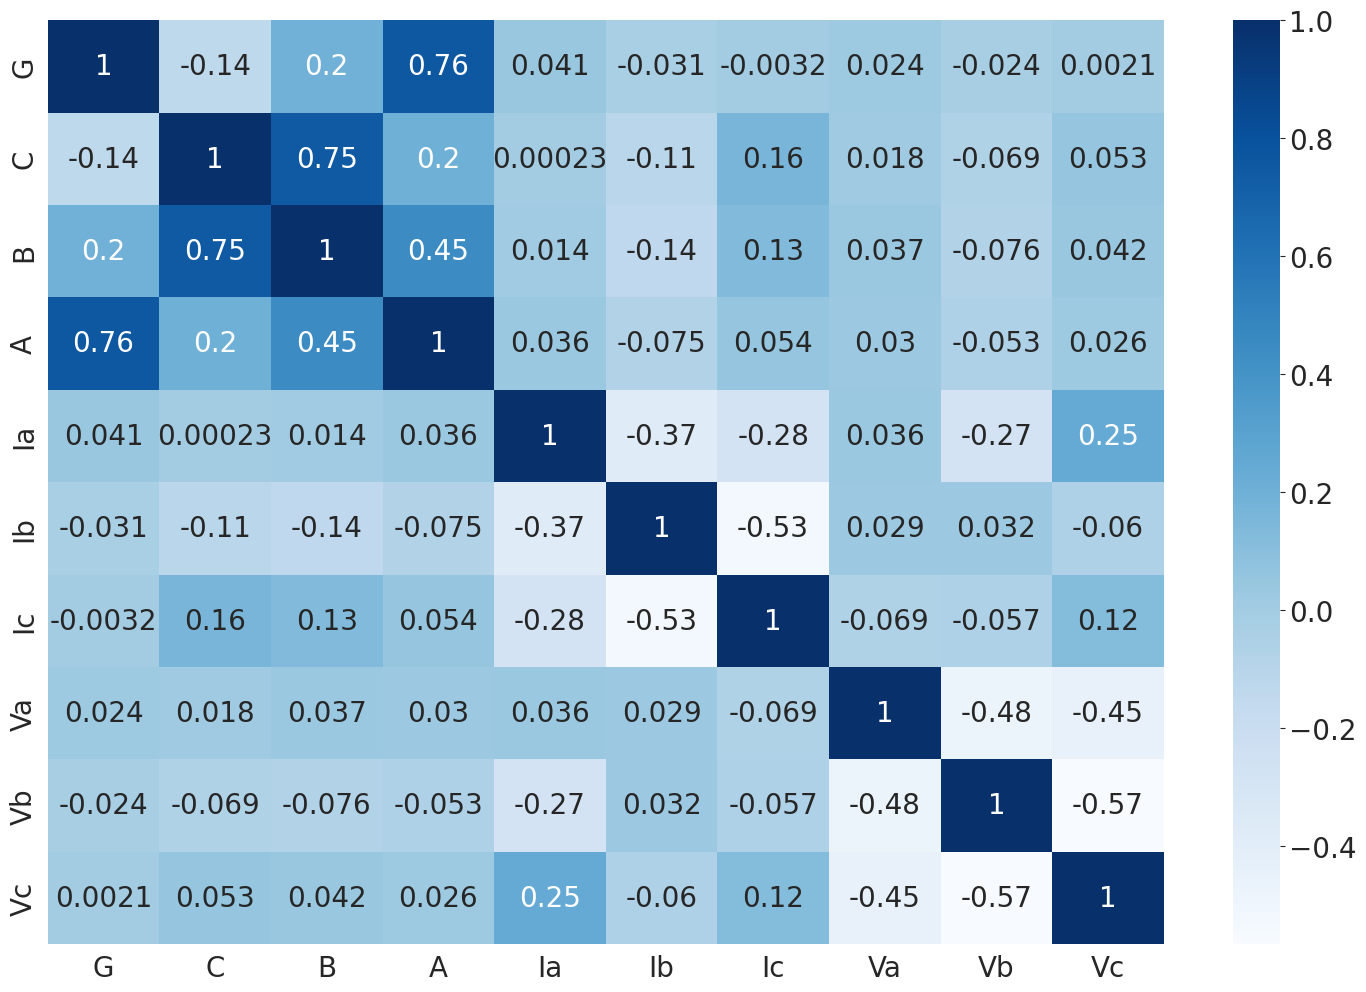

In [ ]:
plt.figure(figsize=(18,12))
sns.heatmap(multi_data.corr(), annot=True, cmap='Blues')
plt.show()

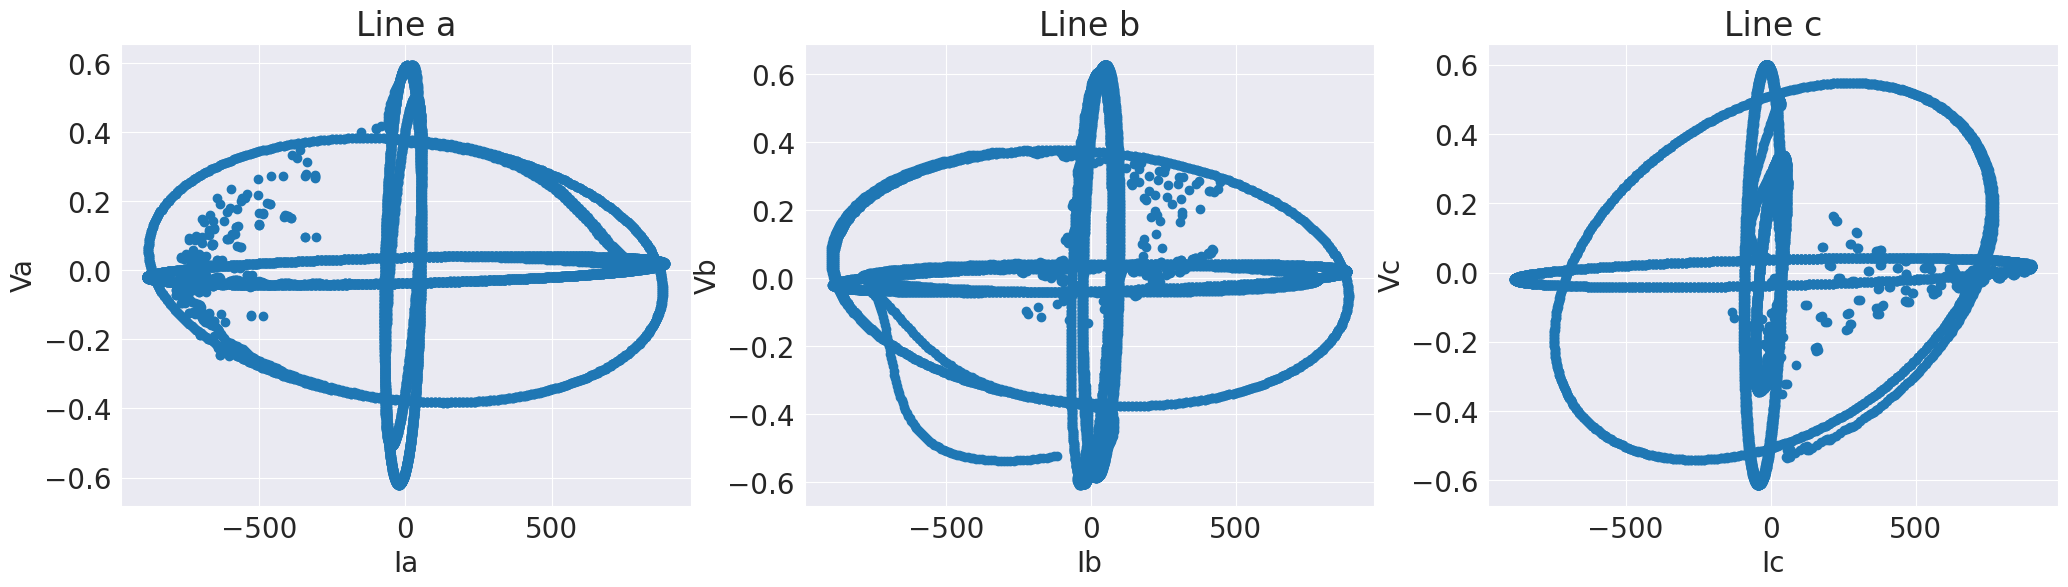

In [ ]:
plt.figure(figsize=(25,6))

a1 = plt.subplot2grid((1,3),(0,0))
a1.scatter(multi_data['Ia'], multi_data['Va'])
a1.set_title('Line a')
a1.set_xlabel('Ia')
a1.set_ylabel('Va')

a2 = plt.subplot2grid((1,3),(0,1))
a2.scatter(multi_data['Ib'], multi_data['Vb'])
a2.set_title('Line b')
a2.set_xlabel('Ib')
a2.set_ylabel('Vb')

a3 = plt.subplot2grid((1,3),(0,2))
a3.scatter(multi_data['Ic'], multi_data['Vc'])
a3.set_title('Line c')
a3.set_xlabel('Ic')
a3.set_ylabel('Vc')

plt.show()

In [ ]:
def dist(cola,colb):

    fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(18,10))

    sns.distplot(multi_data[cola], label='Line Current', hist=True, color='#fc0328', ax=axs[0])
    sns.distplot(multi_data[colb], label='Line Voltage', hist=True, color='#0c06c7', ax=axs[1])

    axs[0].legend(loc='upper right', prop={'size': 12})
    axs[1].legend(loc='upper right', prop={'size': 12})

    plt.show()

In [ ]:
for cola, colb in lines:
    dist(cola,colb)
    print('\n')

NameError: name 'lines' is not defined

Model Building

In [ ]:
multi_data['faultType'] = multi_data['G'].astype(str) + multi_data['C'].astype(str) + multi_data['B'].astype(str) + multi_data['A'].astype(str)
multi_data.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,faultType
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001


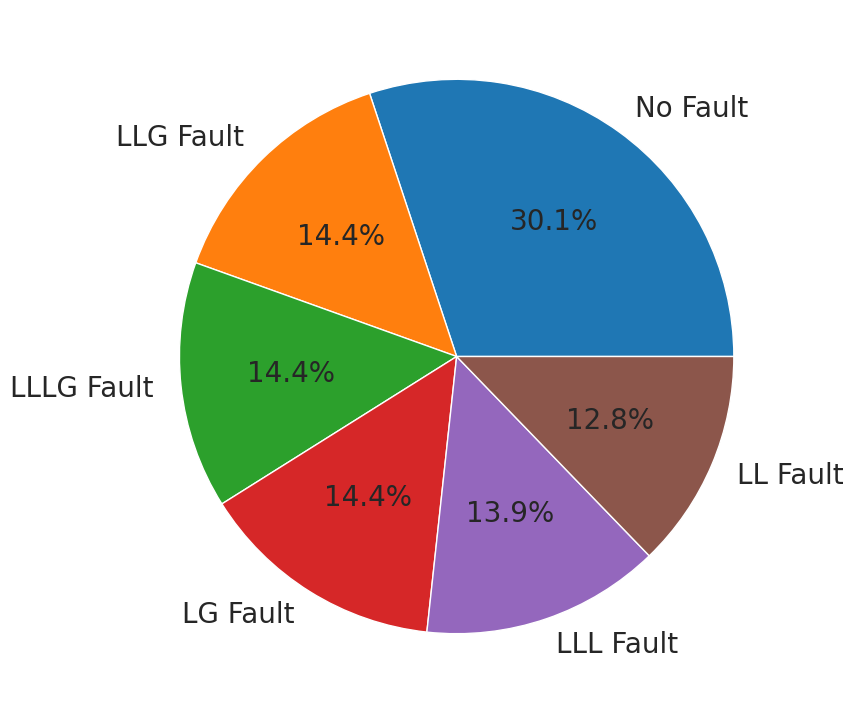

In [ ]:
plt.pie(multi_data['faultType'].value_counts(), autopct='%1.1f%%',
       labels=['No Fault', 'LLG Fault', 'LLLG Fault', 'LG Fault', 'LLL Fault', 'LL Fault'])
plt.show()

In [ ]:
X = multi_data.drop(['G','C','B','A','faultType'], axis=1)
y = multi_data['faultType']

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

ValueError: y contains 1 class after sample_weight trimmed classes with zero weights, while a minimum of 2 classes are required.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB
None
   G  C  B  A          Ia          Ib          Ic        Va        Vb  \
0  1  0  0  1 -151.291812   -9.677452   85.800162  0.400750 -0.132935   
1  1  0  0  1 -336.186183  -76.283262   18.328897  0.312732 -0.123633   
2  1  0  0  1 -502.891583 -174.648023  -80.924663  0.265728 -0.114301   
3  1  0  0  1 -593.941905 -217.703359 -124.891924  0.235511 -0.104940   
4  1  0  0  1 -643.663617 -

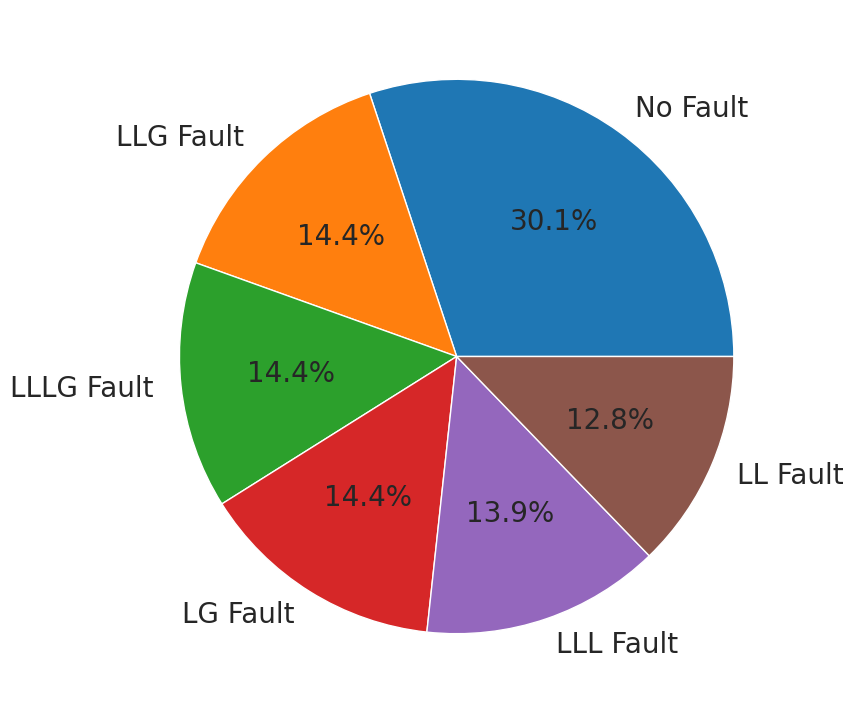

GBM Stacking Classifier Metrics:
Accuracy: 0.9322033898305084
Precision: 0.9324220188178504
Recall: 0.9322033898305084
F1-score: 0.9321816772779808

Linear Regression Stacking Classifier Metrics:
Accuracy: 0.8398305084745763
Precision: 0.8398899870030437
Recall: 0.8398305084745763
F1-score: 0.8395960343076249


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Load dataset from CSV file
multi_data = pd.read_csv('/content/drive/MyDrive/Dataset/classData.csv')

# Display basic info and check for missing values
print(multi_data.info())
print(multi_data.head())
print(f'Any missing values: {any(multi_data.isna().sum() > 0)}')

# Print number of samples and features
print(f'Number of Samples: {multi_data.shape[0]}\nNumber of Features: {multi_data.shape[1]}')

# Create a new column 'faultType' by combining columns 'G', 'C', 'B', 'A'
multi_data['faultType'] = multi_data['G'].astype(str) + multi_data['C'].astype(str) + multi_data['B'].astype(str) + multi_data['A'].astype(str)
print(multi_data.head())

# Plot distribution of fault types
plt.pie(multi_data['faultType'].value_counts(), autopct='%1.1f%%',
        labels=['No Fault', 'LLG Fault', 'LLLG Fault', 'LG Fault', 'LLL Fault', 'LL Fault'])
plt.show()

# Prepare feature matrix X and target vector y
X = multi_data.drop(['G', 'C', 'B', 'A', 'faultType'], axis=1)
y = multi_data['faultType']

# Encode target labels
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

# Define base learners
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('nb', GaussianNB())
]

# Define meta-learners
meta_learner_gbm = GradientBoostingClassifier(random_state=42)
meta_learner_lr = LogisticRegression(random_state=42)

# Create stacking classifiers
stacking_classifier_gbm = StackingClassifier(estimators=base_learners, final_estimator=meta_learner_gbm)
stacking_classifier_lr = StackingClassifier(estimators=base_learners, final_estimator=meta_learner_lr)

# Train the stacking classifiers
stacking_classifier_gbm.fit(X_train, y_train)
stacking_classifier_lr.fit(X_train, y_train)

# Predict on the test set
y_pred_gbm = stacking_classifier_gbm.predict(X_test)
y_pred_lr = stacking_classifier_lr.predict(X_test)

# Calculate metrics for Gradient Boosting meta-learner
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
precision_gbm = precision_score(y_test, y_pred_gbm, average='weighted')
recall_gbm = recall_score(y_test, y_pred_gbm, average='weighted')
f1_gbm = f1_score(y_test, y_pred_gbm, average='weighted')

# Calculate metrics for Logistic Regression meta-learner
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

# Print the metrics
print("GBM Stacking Classifier Metrics:")
print("Accuracy:", accuracy_gbm)
print("Precision:", precision_gbm)
print("Recall:", recall_gbm)
print("F1-score:", f1_gbm)

print("\nLinear Regression Stacking Classifier Metrics:")
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1-score:", f1_lr)


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import numpy as np

# Load dataset from CSV file
multi_data = pd.read_csv('/content/drive/MyDrive/Dataset/classData.csv')

# Display basic info and check for missing values
print(multi_data.info())
print(multi_data.head())
print(f'Any missing values: {any(multi_data.isna().sum() > 0)}')

# Print number of samples and features
print(f'Number of Samples: {multi_data.shape[0]}\nNumber of Features: {multi_data.shape[1]}')

# Create a new column 'faultType' by combining columns 'G', 'C', 'B', 'A'
multi_data['faultType'] = multi_data['G'].astype(str) + multi_data['C'].astype(str) + multi_data['B'].astype(str) + multi_data['A'].astype(str)
print(multi_data.head())

# Prepare feature matrix X and target vector y
X = multi_data.drop(['G', 'C', 'B', 'A', 'faultType'], axis=1)
y = multi_data['faultType']

# Encode target labels
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

# Define base learners
model_1 = RandomForestClassifier(n_estimators=100, random_state=42)
model_2 = GaussianNB()

# Train base learners
model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)

# Get predictions from base learners
pred_1 = model_1.predict_proba(X_test)
pred_2 = model_2.predict_proba(X_test)

# Combine predictions using weighted average (you can adjust the weights)
blended_pred = (pred_1 * 0.6) + (pred_2 * 0.4)

# Convert probabilities to class labels
final_pred = np.argmax(blended_pred, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_test, final_pred)
precision = precision_score(y_test, final_pred, average='weighted')
recall = recall_score(y_test, final_pred, average='weighted')
f1 = f1_score(y_test, final_pred, average='weighted')

# Print the metrics
print("Blending Ensemble Metrics (Random Forest + Naive Bayes):")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB
None
   G  C  B  A          Ia          Ib          Ic        Va        Vb  \
0  1  0  0  1 -151.291812   -9.677452   85.800162  0.400750 -0.132935   
1  1  0  0  1 -336.186183  -76.283262   18.328897  0.312732 -0.123633   
2  1  0  0  1 -502.891583 -174.648023  -80.924663  0.265728 -0.114301   
3  1  0  0  1 -593.941905 -217.703359 -124.891924  0.235511 -0.104940   
4  1  0  0  1 -643.663617 -

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB
None
   G  C  B  A          Ia          Ib          Ic        Va        Vb  \
0  1  0  0  1 -151.291812   -9.677452   85.800162  0.400750 -0.132935   
1  1  0  0  1 -336.186183  -76.283262   18.328897  0.312732 -0.123633   
2  1  0  0  1 -502.891583 -174.648023  -80.924663  0.265728 -0.114301   
3  1  0  0  1 -593.941905 -217.703359 -124.891924  0.235511 -0.104940   
4  1  0  0  1 -643.663617 -

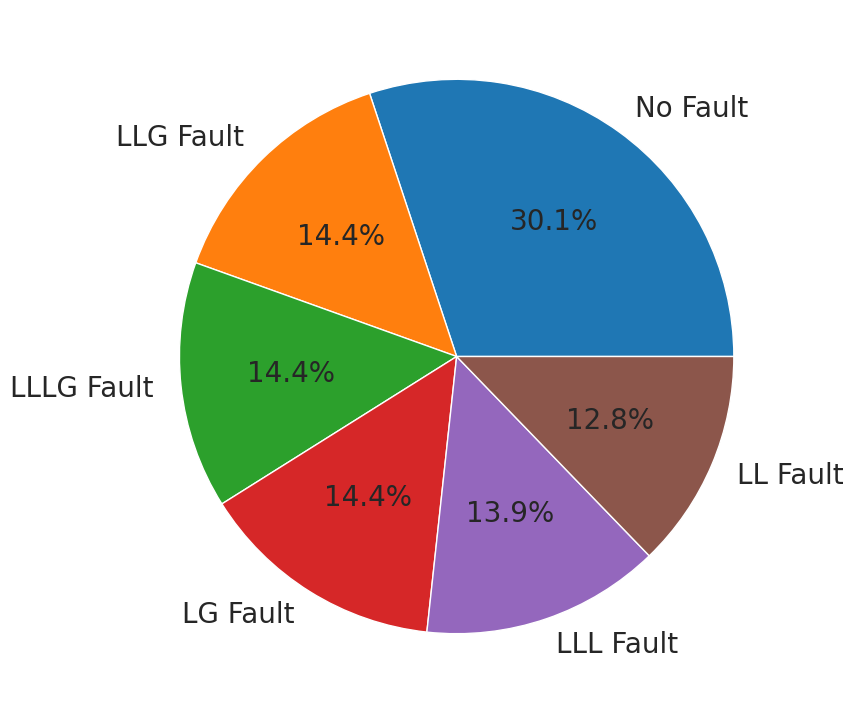

GBM Stacking Classifier Metrics:
Accuracy: 0.9145473041709054
Precision: 0.9147973227033754
Recall: 0.9145473041709054
F1-score: 0.9144036144492947


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Load dataset from CSV file
multi_data = pd.read_csv('/content/drive/MyDrive/Dataset/classData.csv')

# Display basic info and check for missing values
print(multi_data.info())
print(multi_data.head())
print(f'Any missing values: {any(multi_data.isna().sum() > 0)}')

# Print number of samples and features
print(f'Number of Samples: {multi_data.shape[0]}\nNumber of Features: {multi_data.shape[1]}')

# Create a new column 'faultType' by combining columns 'G', 'C', 'B', 'A'
multi_data['faultType'] = multi_data['G'].astype(str) + multi_data['C'].astype(str) + multi_data['B'].astype(str) + multi_data['A'].astype(str)
print(multi_data.head())

# Plot distribution of fault types
plt.pie(multi_data['faultType'].value_counts(), autopct='%1.1f%%',
        labels=['No Fault', 'LLG Fault', 'LLLG Fault', 'LG Fault', 'LLL Fault', 'LL Fault'])
plt.show()

# Prepare feature matrix X and target vector y
X = multi_data.drop(['G', 'C', 'B', 'A', 'faultType'], axis=1)
y = multi_data['faultType']

# Encode target labels
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

# Define base learners
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42))
    #('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        #('knn', KNeighborsClassifier())
    # ('nb', GaussianNB()),
      #  ('dt', DecisionTreeClassifier(random_state=42))
     #('knn', KNeighborsClassifier()),
     #   ('nb', GaussianNB())
     #('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
      #  ('nb', GaussianNB())
]

# Define meta-learner
meta_learner_gbm = GradientBoostingClassifier(random_state=42)

# Create stacking classifier
stacking_classifier_gbm = StackingClassifier(estimators=base_learners, final_estimator=meta_learner_gbm)

# Train the stacking classifier
stacking_classifier_gbm.fit(X_train, y_train)

# Predict on the test set
y_pred_gbm = stacking_classifier_gbm.predict(X_test)

# Calculate metrics
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
precision_gbm = precision_score(y_test, y_pred_gbm, average='weighted')
recall_gbm = recall_score(y_test, y_pred_gbm, average='weighted')
f1_gbm = f1_score(y_test, y_pred_gbm, average='weighted')

# Print the metrics
print("GBM Stacking Classifier Metrics:")
print("Accuracy:", accuracy_gbm)
print("Precision:", precision_gbm)
print("Recall:", recall_gbm)
print("F1-score:", f1_gbm)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB
None
   G  C  B  A          Ia          Ib          Ic        Va        Vb  \
0  1  0  0  1 -151.291812   -9.677452   85.800162  0.400750 -0.132935   
1  1  0  0  1 -336.186183  -76.283262   18.328897  0.312732 -0.123633   
2  1  0  0  1 -502.891583 -174.648023  -80.924663  0.265728 -0.114301   
3  1  0  0  1 -593.941905 -217.703359 -124.891924  0.235511 -0.104940   
4  1  0  0  1 -643.663617 -

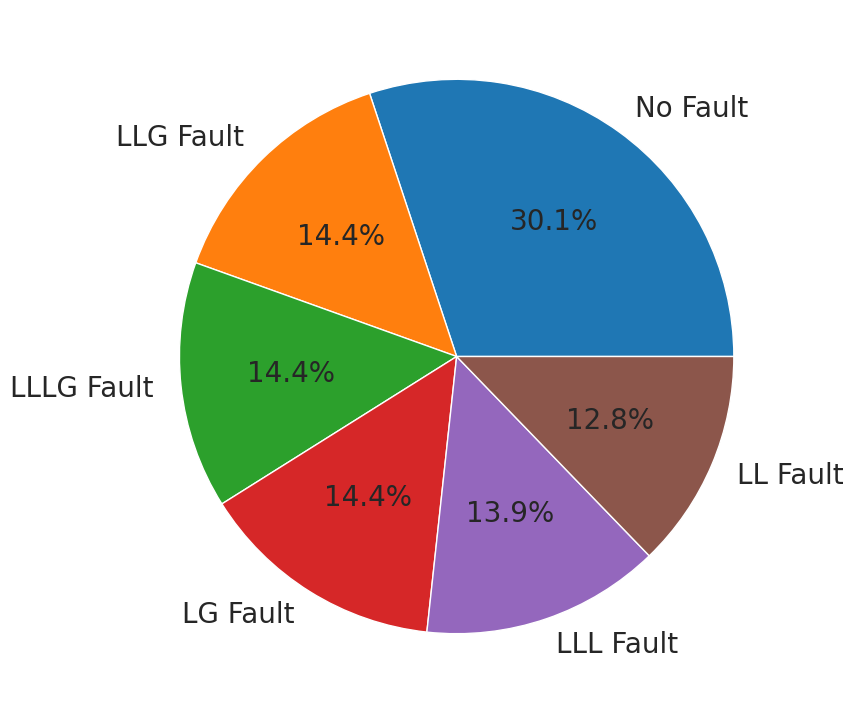

Epoch 1/10
188/188 - 6s - loss: 1.2451 - accuracy: 0.4915 - val_loss: 0.6750 - val_accuracy: 0.6891 - 6s/epoch - 34ms/step
Epoch 2/10
188/188 - 1s - loss: 0.5835 - accuracy: 0.7244 - val_loss: 0.4975 - val_accuracy: 0.7564 - 768ms/epoch - 4ms/step
Epoch 3/10
188/188 - 1s - loss: 0.4934 - accuracy: 0.7660 - val_loss: 0.4588 - val_accuracy: 0.7414 - 705ms/epoch - 4ms/step
Epoch 4/10
188/188 - 1s - loss: 0.4388 - accuracy: 0.7779 - val_loss: 0.4009 - val_accuracy: 0.8161 - 723ms/epoch - 4ms/step
Epoch 5/10
188/188 - 1s - loss: 0.4021 - accuracy: 0.7922 - val_loss: 0.3652 - val_accuracy: 0.7967 - 728ms/epoch - 4ms/step
Epoch 6/10
188/188 - 1s - loss: 0.3797 - accuracy: 0.7977 - val_loss: 0.3595 - val_accuracy: 0.7982 - 746ms/epoch - 4ms/step
Epoch 7/10
188/188 - 1s - loss: 0.3693 - accuracy: 0.8066 - val_loss: 0.3286 - val_accuracy: 0.8012 - 722ms/epoch - 4ms/step
Epoch 8/10
188/188 - 1s - loss: 0.3570 - accuracy: 0.8011 - val_loss: 0.3862 - val_accuracy: 0.8012 - 719ms/epoch - 4ms/step
Ep

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Load dataset from CSV file
multi_data = pd.read_csv('/content/drive/MyDrive/Dataset/classData.csv')

# Display basic info and check for missing values
print(multi_data.info())
print(multi_data.head())
print(f'Any missing values: {any(multi_data.isna().sum() > 0)}')

# Handle missing values (if any)
multi_data.fillna(method='ffill', inplace=True)

# Create a new column 'faultType' by combining columns 'G', 'C', 'B', 'A'
multi_data['faultType'] = multi_data['G'].astype(str) + multi_data['C'].astype(str) + multi_data['B'].astype(str) + multi_data['A'].astype(str)
print(multi_data.head())

# Plot distribution of fault types
plt.pie(multi_data['faultType'].value_counts(), autopct='%1.1f%%',
        labels=['No Fault', 'LLG Fault', 'LLLG Fault', 'LG Fault', 'LLL Fault', 'LL Fault'])
plt.show()

# Prepare feature matrix X and target vector y
X = multi_data.drop(['G', 'C', 'B', 'A', 'faultType'], axis=1)
y = multi_data['faultType']

# Encode target labels
le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y)

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = X.reshape((X.shape[0], X.shape[1], 1))  # Reshape for LSTM input

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred = np.argmax(y_pred, axis=1)
    y_test = np.argmax(y_test, axis=1)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    return accuracy, precision, recall, f1

# Define LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(256, input_shape=(X_train.shape[1], X_train.shape[2])))
lstm_model.add(Dropout(0.1))
lstm_model.add(Dense(y_train.shape[1], activation='softmax'))
lstm_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=2)

# Evaluate LSTM model
accuracy_lstm, precision_lstm, recall_lstm, f1_lstm = evaluate_model(lstm_model, X_test, y_test)

# Define Bi-LSTM model
bilstm_model = Sequential()
bilstm_model.add(Bidirectional(LSTM(256), input_shape=(X_train.shape[1], X_train.shape[2])))
bilstm_model.add(Dropout(0.1))
bilstm_model.add(Dense(y_train.shape[1], activation='softmax'))
bilstm_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
bilstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=2)

# Evaluate Bi-LSTM model
accuracy_bilstm, precision_bilstm, recall_bilstm, f1_bilstm = evaluate_model(bilstm_model, X_test, y_test)

# Define N-layered Bi-LSTM model
n_bilstm_model = Sequential()
n_bilstm_model.add(Bidirectional(LSTM(256, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
n_bilstm_model.add(Dropout(0.1))
n_bilstm_model.add(Bidirectional(LSTM(256)))
n_bilstm_model.add(Dropout(0.1))
n_bilstm_model.add(Dense(y_train.shape[1], activation='softmax'))
n_bilstm_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
n_bilstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=2)

# Evaluate N-layered Bi-LSTM model
accuracy_n_bilstm, precision_n_bilstm, recall_n_bilstm, f1_n_bilstm = evaluate_model(n_bilstm_model, X_test, y_test)

# Print the metrics for each model
print("LSTM Model Metrics:")
print("Accuracy:", accuracy_lstm)
print("Precision:", precision_lstm)
print("Recall:", recall_lstm)
print("F1-score:", f1_lstm)

print("Bi-LSTM Model Metrics:")
print("Accuracy:", accuracy_bilstm)
print("Precision:", precision_bilstm)
print("Recall:", recall_bilstm)
print("F1-score:", f1_bilstm)

print("N-layered Bi-LSTM Model Metrics:")
print("Accuracy:", accuracy_n_bilstm)
print("Precision:", precision_n_bilstm)
print("Recall:", recall_n_bilstm)
print("F1-score:", f1_n_bilstm)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB
None
   G  C  B  A          Ia          Ib          Ic        Va        Vb  \
0  1  0  0  1 -151.291812   -9.677452   85.800162  0.400750 -0.132935   
1  1  0  0  1 -336.186183  -76.283262   18.328897  0.312732 -0.123633   
2  1  0  0  1 -502.891583 -174.648023  -80.924663  0.265728 -0.114301   
3  1  0  0  1 -593.941905 -217.703359 -124.891924  0.235511 -0.104940   
4  1  0  0  1 -643.663617 -

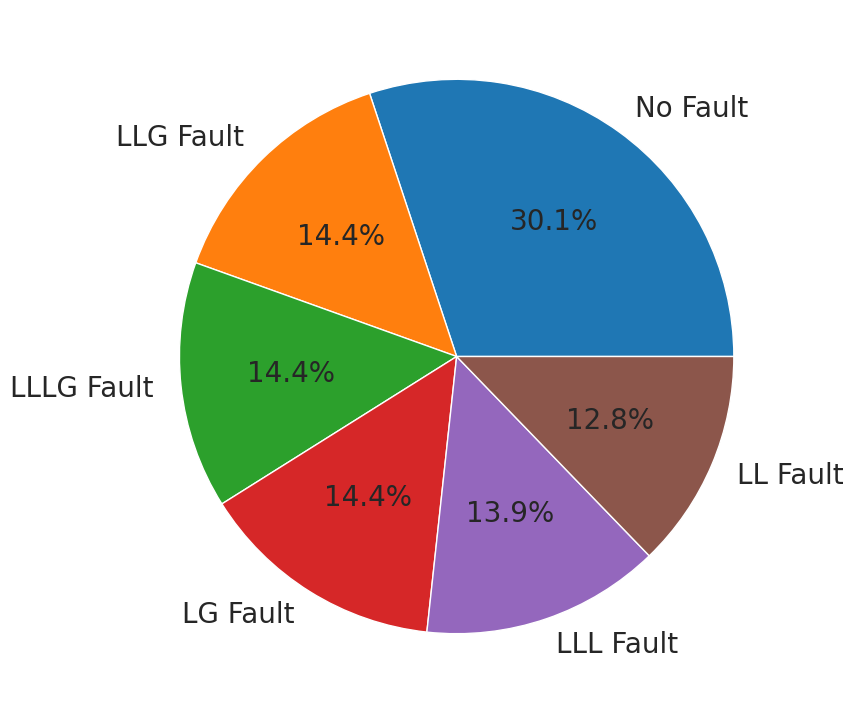

Epoch 1/50
188/188 - 3s - loss: 1.3162 - accuracy: 0.4546 - val_loss: 0.7444 - val_accuracy: 0.6383 - lr: 0.0010 - 3s/epoch - 16ms/step
Epoch 2/50
188/188 - 1s - loss: 0.6602 - accuracy: 0.7014 - val_loss: 0.5808 - val_accuracy: 0.6906 - lr: 0.0010 - 741ms/epoch - 4ms/step
Epoch 3/50
188/188 - 1s - loss: 0.5314 - accuracy: 0.7462 - val_loss: 0.4400 - val_accuracy: 0.7937 - lr: 0.0010 - 920ms/epoch - 5ms/step
Epoch 4/50
188/188 - 1s - loss: 0.4585 - accuracy: 0.7756 - val_loss: 0.4316 - val_accuracy: 0.7698 - lr: 0.0010 - 973ms/epoch - 5ms/step
Epoch 5/50
188/188 - 1s - loss: 0.4199 - accuracy: 0.7889 - val_loss: 0.3885 - val_accuracy: 0.7788 - lr: 0.0010 - 1s/epoch - 6ms/step
Epoch 6/50
188/188 - 1s - loss: 0.4105 - accuracy: 0.7967 - val_loss: 0.3607 - val_accuracy: 0.7997 - lr: 0.0010 - 1s/epoch - 5ms/step
Epoch 7/50
188/188 - 1s - loss: 0.3901 - accuracy: 0.7944 - val_loss: 0.3625 - val_accuracy: 0.7982 - lr: 0.0010 - 865ms/epoch - 5ms/step
Epoch 8/50
188/188 - 1s - loss: 0.3654 - a

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load dataset from CSV file
multi_data = pd.read_csv('/content/drive/MyDrive/Dataset/classData.csv')

# Display basic info and check for missing values
print(multi_data.info())
print(multi_data.head())
print(f'Any missing values: {any(multi_data.isna().sum() > 0)}')

# Handle missing values (if any)
multi_data.fillna(method='ffill', inplace=True)

# Create a new column 'faultType' by combining columns 'G', 'C', 'B', 'A'
multi_data['faultType'] = multi_data['G'].astype(str) + multi_data['C'].astype(str) + multi_data['B'].astype(str) + multi_data['A'].astype(str)
print(multi_data.head())

# Plot distribution of fault types
plt.pie(multi_data['faultType'].value_counts(), autopct='%1.1f%%',
        labels=['No Fault', 'LLG Fault', 'LLLG Fault', 'LG Fault', 'LLL Fault', 'LL Fault'])
plt.show()

# Prepare feature matrix X and target vector y
X = multi_data.drop(['G', 'C', 'B', 'A', 'faultType'], axis=1)
y = multi_data['faultType']

# Encode target labels
le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y)

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = X.reshape((X.shape[0], X.shape[1], 1))  # Reshape for LSTM input

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred = np.argmax(y_pred, axis=1)
    y_test = np.argmax(y_test, axis=1)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    return accuracy, precision, recall, f1

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Define LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(256, input_shape=(X_train.shape[1], X_train.shape[2])))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(y_train.shape[1], activation='softmax'))
lstm_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2, callbacks=[early_stopping, reduce_lr])

# Evaluate LSTM model
accuracy_lstm, precision_lstm, recall_lstm, f1_lstm = evaluate_model(lstm_model, X_test, y_test)

# Define Bi-LSTM model
bilstm_model = Sequential()
bilstm_model.add(Bidirectional(LSTM(256), input_shape=(X_train.shape[1], X_train.shape[2])))
bilstm_model.add(Dropout(0.5))
bilstm_model.add(Dense(y_train.shape[1], activation='softmax'))
bilstm_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
bilstm_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2, callbacks=[early_stopping, reduce_lr])

# Evaluate Bi-LSTM model
accuracy_bilstm, precision_bilstm, recall_bilstm, f1_bilstm = evaluate_model(bilstm_model, X_test, y_test)

# Define N-layered Bi-LSTM model
n_bilstm_model = Sequential()
n_bilstm_model.add(Bidirectional(LSTM(256, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
n_bilstm_model.add(Dropout(0.5))
n_bilstm_model.add(Bidirectional(LSTM(256)))
n_bilstm_model.add(Dropout(0.5))
n_bilstm_model.add(Dense(y_train.shape[1], activation='softmax'))
n_bilstm_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
n_bilstm_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2, callbacks=[early_stopping, reduce_lr])

# Evaluate N-layered Bi-LSTM model
accuracy_n_bilstm, precision_n_bilstm, recall_n_bilstm, f1_n_bilstm = evaluate_model(n_bilstm_model, X_test, y_test)

# Print the metrics for each model
print("LSTM Model Metrics:")
print("Accuracy:", accuracy_lstm)
print("Precision:", precision_lstm)
print("Recall:", recall_lstm)
print("F1-score:", f1_lstm)

print("Bi-LSTM Model Metrics:")
print("Accuracy:", accuracy_bilstm)
print("Precision:", precision_bilstm)
print("Recall:", recall_bilstm)
print("F1-score:", f1_bilstm)

print("N-layered Bi-LSTM Model Metrics:")
print("Accuracy:", accuracy_n_bilstm)
print("Precision:", precision_n_bilstm)
print("Recall:", recall_n_bilstm)
print("F1-score:", f1_n_bilstm)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB
None
   G  C  B  A          Ia          Ib          Ic        Va        Vb  \
0  1  0  0  1 -151.291812   -9.677452   85.800162  0.400750 -0.132935   
1  1  0  0  1 -336.186183  -76.283262   18.328897  0.312732 -0.123633   
2  1  0  0  1 -502.891583 -174.648023  -80.924663  0.265728 -0.114301   
3  1  0  0  1 -593.941905 -217.703359 -124.891924  0.235511 -0.104940   
4  1  0  0  1 -643.663617 -

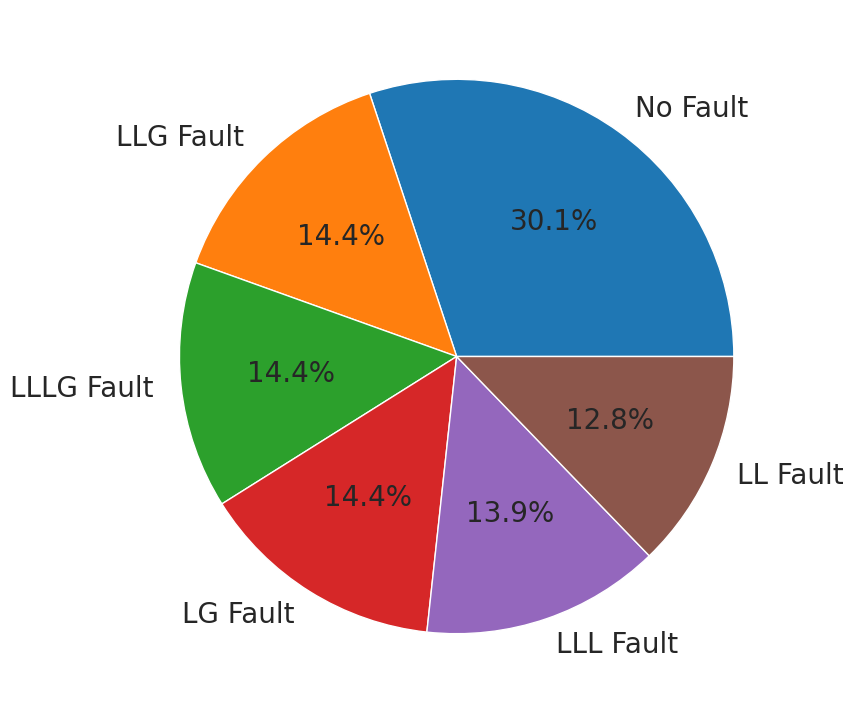

Epoch 1/50
188/188 - 15s - loss: 1.1531 - accuracy: 0.5070 - val_loss: 0.7085 - val_accuracy: 0.6428 - lr: 0.0010 - 15s/epoch - 79ms/step
Epoch 2/50
188/188 - 2s - loss: 0.6761 - accuracy: 0.6803 - val_loss: 0.5614 - val_accuracy: 0.7324 - lr: 0.0010 - 2s/epoch - 12ms/step
Epoch 3/50
188/188 - 2s - loss: 0.5673 - accuracy: 0.7395 - val_loss: 0.5169 - val_accuracy: 0.7698 - lr: 0.0010 - 2s/epoch - 11ms/step
Epoch 4/50
188/188 - 2s - loss: 0.5112 - accuracy: 0.7650 - val_loss: 0.4358 - val_accuracy: 0.7937 - lr: 0.0010 - 2s/epoch - 11ms/step
Epoch 5/50
188/188 - 2s - loss: 0.4384 - accuracy: 0.7823 - val_loss: 0.4556 - val_accuracy: 0.7803 - lr: 0.0010 - 2s/epoch - 11ms/step
Epoch 6/50
188/188 - 2s - loss: 0.3809 - accuracy: 0.7982 - val_loss: 0.3723 - val_accuracy: 0.7758 - lr: 0.0010 - 2s/epoch - 11ms/step
Epoch 7/50
188/188 - 3s - loss: 0.3378 - accuracy: 0.8140 - val_loss: 0.3323 - val_accuracy: 0.8012 - lr: 0.0010 - 3s/epoch - 17ms/step
Epoch 8/50
188/188 - 2s - loss: 0.3307 - accur

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load dataset from CSV file
multi_data = pd.read_csv('/content/drive/MyDrive/Dataset/classData.csv')

# Display basic info and check for missing values
print(multi_data.info())
print(multi_data.head())
print(f'Any missing values: {any(multi_data.isna().sum() > 0)}')

# Handle missing values (if any)
multi_data.fillna(method='ffill', inplace=True)

# Create a new column 'faultType' by combining columns 'G', 'C', 'B', 'A'
multi_data['faultType'] = multi_data['G'].astype(str) + multi_data['C'].astype(str) + multi_data['B'].astype(str) + multi_data['A'].astype(str)
print(multi_data.head())

# Plot distribution of fault types
plt.pie(multi_data['faultType'].value_counts(), autopct='%1.1f%%',
        labels=['No Fault', 'LLG Fault', 'LLLG Fault', 'LG Fault', 'LLL Fault', 'LL Fault'])
plt.show()

# Prepare feature matrix X and target vector y
X = multi_data.drop(['G', 'C', 'B', 'A', 'faultType'], axis=1)
y = multi_data['faultType']

# Encode target labels
le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y)

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = X.reshape((X.shape[0], X.shape[1], 1))  # Reshape for LSTM input

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred = np.argmax(y_pred, axis=1)
    y_test = np.argmax(y_test, axis=1)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    return accuracy, precision, recall, f1

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.1)

# Define 3-layered Bi-LSTM model
three_layered_bilstm_model = Sequential()
three_layered_bilstm_model.add(Bidirectional(LSTM(256, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
three_layered_bilstm_model.add(Dropout(0.3))
three_layered_bilstm_model.add(Bidirectional(LSTM(256, return_sequences=True)))
three_layered_bilstm_model.add(Dropout(0.3))
three_layered_bilstm_model.add(Bidirectional(LSTM(256)))
three_layered_bilstm_model.add(Dropout(0.3))
three_layered_bilstm_model.add(Dense(y_train.shape[1], activation='softmax'))
three_layered_bilstm_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
three_layered_bilstm_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2, callbacks=[early_stopping, reduce_lr])

# Evaluate 3-layered Bi-LSTM model
accuracy_three_layered_bilstm, precision_three_layered_bilstm, recall_three_layered_bilstm, f1_three_layered_bilstm = evaluate_model(three_layered_bilstm_model, X_test, y_test)

# Print the metrics for the 3-layered Bi-LSTM model
print("3-Layered Bi-LSTM Model Metrics:")
print("Accuracy:", accuracy_three_layered_bilstm)
print("Precision:", precision_three_layered_bilstm)
print("Recall:", recall_three_layered_bilstm)
print("F1-score:", f1_three_layered_bilstm)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB
None
   G  C  B  A          Ia          Ib          Ic        Va        Vb  \
0  1  0  0  1 -151.291812   -9.677452   85.800162  0.400750 -0.132935   
1  1  0  0  1 -336.186183  -76.283262   18.328897  0.312732 -0.123633   
2  1  0  0  1 -502.891583 -174.648023  -80.924663  0.265728 -0.114301   
3  1  0  0  1 -593.941905 -217.703359 -124.891924  0.235511 -0.104940   
4  1  0  0  1 -643.663617 -

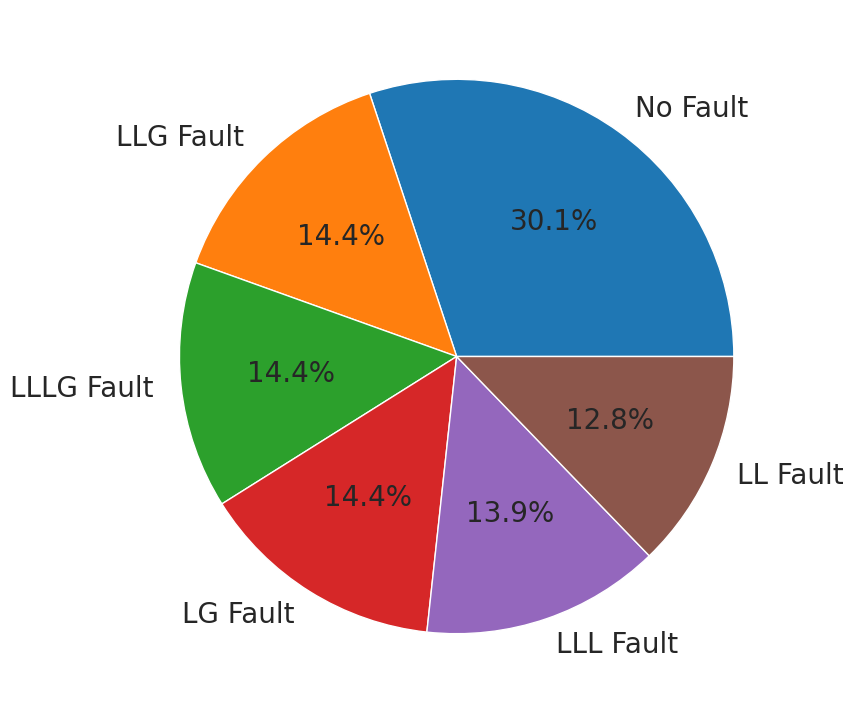

GBM Stacking Classifier Metrics:
Best Parameters: {'final_estimator__learning_rate': 0.1, 'final_estimator__n_estimators': 100}
Accuracy: 0.9279661016949152
Precision: 0.927992533882713
Recall: 0.9279661016949152
F1-score: 0.9279672567148753


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Load dataset from CSV file
multi_data = pd.read_csv('/content/drive/MyDrive/Dataset/classData.csv')

# Display basic info and check for missing values
print(multi_data.info())
print(multi_data.head())
print(f'Any missing values: {any(multi_data.isna().sum() > 0)}')

# Handle missing values (if any)
multi_data.fillna(method='ffill', inplace=True)

# Create a new column 'faultType' by combining columns 'G', 'C', 'B', 'A'
multi_data['faultType'] = multi_data['G'].astype(str) + multi_data['C'].astype(str) + multi_data['B'].astype(str) + multi_data['A'].astype(str)
print(multi_data.head())

# Plot distribution of fault types
plt.pie(multi_data['faultType'].value_counts(), autopct='%1.1f%%',
        labels=['No Fault', 'LLG Fault', 'LLLG Fault', 'LG Fault', 'LLL Fault', 'LL Fault'])
plt.show()

# Prepare feature matrix X and target vector y
X = multi_data.drop(['G', 'C', 'B', 'A', 'faultType'], axis=1)
y = multi_data['faultType']

# Encode target labels
le = LabelEncoder()
y = le.fit_transform(y)

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

# Define base learners
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42))
]

# Define meta-learner
meta_learner_gbm = GradientBoostingClassifier(random_state=42)

# Create stacking classifier
stacking_classifier_gbm = StackingClassifier(estimators=base_learners, final_estimator=meta_learner_gbm)

# Hyperparameter tuning for the meta-learner
param_grid = {
    'final_estimator__n_estimators': [100, 200],
    'final_estimator__learning_rate': [0.1, 0.001]
}

grid_search = GridSearchCV(estimator=stacking_classifier_gbm, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Predict on the test set
y_pred_gbm = grid_search.best_estimator_.predict(X_test)

# Calculate metrics
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
precision_gbm = precision_score(y_test, y_pred_gbm, average='weighted')
recall_gbm = recall_score(y_test, y_pred_gbm, average='weighted')
f1_gbm = f1_score(y_test, y_pred_gbm, average='weighted')

# Print the metrics
print("GBM Stacking Classifier Metrics:")
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_gbm)
print("Precision:", precision_gbm)
print("Recall:", recall_gbm)
print("F1-score:", f1_gbm)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6681, 6), (1180, 6), (6681,), (1180,))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Initialize individual classifiers
rf_classifier = RandomForestClassifier()
dt_classifier = DecisionTreeClassifier()

# Create a soft voting classifier
voting_classifier = VotingClassifier(estimators=[('rf', rf_classifier), ('dt', dt_classifier)], voting='soft')

# Train the voting classifier
voting_classifier.fit(X_train, y_train)

# Make predictions
y_pred = voting_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Compute precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8906779661016949
Precision: 0.8910316421209165
Recall: 0.8906779661016949
F1-score: 0.8907422432571277


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier()
}

# Dictionary to store metrics
metrics = {}

# Loop through each classifier
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store metrics in the dictionary
    metrics[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    }

# Print metrics
for name, scores in metrics.items():
    print(name, "Metrics:")
    for metric, score in scores.items():
        print(metric + ":", score)
    print()


Decision Tree Metrics:
Accuracy: 0.885593220338983
Precision: 0.8856179809794458
Recall: 0.885593220338983
F1-score: 0.8855739162435217

Random Forest Metrics:
Accuracy: 0.8822033898305085
Precision: 0.8822160405100912
Recall: 0.8822033898305085
F1-score: 0.8821862270127162

KNN Metrics:
Accuracy: 0.7830508474576271
Precision: 0.7770502782540957
Recall: 0.7830508474576271
F1-score: 0.7798504114552878

SVM Metrics:
Accuracy: 0.7432203389830508
Precision: 0.7144353516322676
Recall: 0.7432203389830508
F1-score: 0.7225195395698792

Naive Bayes Metrics:
Accuracy: 0.7974576271186441
Precision: 0.7849494485853188
Recall: 0.7974576271186441
F1-score: 0.7665907508065394

AdaBoost Metrics:
Accuracy: 0.788135593220339
Precision: 0.7729330338377356
Recall: 0.788135593220339
F1-score: 0.7635395682330333



In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression Classifier
logistic_classifier = LogisticRegression()

# Train the Logistic Regression Classifier
logistic_classifier.fit(X_train, y_train)

# Make predictions
y_pred_logistic = logistic_classifier.predict(X_test)

# Calculate Accuracy
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

# Calculate Precision
precision_logistic = precision_score(y_test, y_pred_logistic, average='weighted')

# Calculate Recall
recall_logistic = recall_score(y_test, y_pred_logistic, average='weighted')

# Calculate F1-score
f1_logistic = f1_score(y_test, y_pred_logistic, average='weighted')

# Print results
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_logistic)
print("Precision:", precision_logistic)
print("Recall:", recall_logistic)
print("F1-score:", f1_logistic)


Logistic Regression Metrics:
Accuracy: 0.3093220338983051
Precision: 0.16998497872349716
Recall: 0.3093220338983051
F1-score: 0.1675588372563297


In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize individual classifiers
rf_classifier = RandomForestClassifier()
dt_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier()
nb_classifier = GaussianNB()

# Hard Voting - Ensemble 1
voting_classifier_hard = VotingClassifier(
    estimators=[('rf', rf_classifier), ('dt', dt_classifier), ('knn', knn_classifier), ('nb', nb_classifier)],
    voting='hard'
)

# Soft Voting - Ensemble 2
voting_classifier_soft = VotingClassifier(
    estimators=[('rf', rf_classifier), ('dt', dt_classifier), ('knn', knn_classifier), ('nb', nb_classifier)],
    voting='soft'
)

# Train the voting classifiers
voting_classifier_hard.fit(X_train, y_train)
voting_classifier_soft.fit(X_train, y_train)

# Make predictions - Ensemble 1
y_pred_hard = voting_classifier_hard.predict(X_test)

# Make predictions - Ensemble 2
y_pred_soft = voting_classifier_soft.predict(X_test)

# Evaluate the models
metrics_hard = {}
metrics_soft = {}

# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Calculate metrics for Ensemble 1 (Hard Voting)
metrics_hard['Accuracy'], metrics_hard['Precision'], metrics_hard['Recall'], metrics_hard['F1-score'] = calculate_metrics(y_test, y_pred_hard)

# Calculate metrics for Ensemble 2 (Soft Voting)
metrics_soft['Accuracy'], metrics_soft['Precision'], metrics_soft['Recall'], metrics_soft['F1-score'] = calculate_metrics(y_test, y_pred_soft)

# Print results for Ensemble 1 (Hard Voting)
print("Ensemble 1 (Hard Voting) Metrics:")
for metric, score in metrics_hard.items():
    print(metric + ":", score)
print()

# Print results for Ensemble 2 (Soft Voting)
print("Ensemble 2 (Soft Voting) Metrics:")
for metric, score in metrics_soft.items():
    print(metric + ":", score)
print()


Ensemble 1 (Hard Voting) Metrics:
Accuracy: 0.8279661016949152
Precision: 0.8214614498700481
Recall: 0.8279661016949152
F1-score: 0.8182570028188418

Ensemble 2 (Soft Voting) Metrics:
Accuracy: 0.885593220338983
Precision: 0.8851965840063953
Recall: 0.885593220338983
F1-score: 0.8852272530997681



In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define classifiers
rf_classifier = RandomForestClassifier()
dt_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier()
nb_classifier = GaussianNB()

# Define models

# Model 1: Random Forest + Decision Tree + Hard Voting
model_1_hard = VotingClassifier(estimators=[('rf', rf_classifier), ('dt', dt_classifier)], voting='hard')

# Model 1: Random Forest + Decision Tree + Soft Voting
model_1_soft = VotingClassifier(estimators=[('rf', rf_classifier), ('dt', dt_classifier)], voting='soft')

# Model 2: Random Forest + KNN + Hard Voting
model_2_hard = VotingClassifier(estimators=[('rf', rf_classifier), ('knn', knn_classifier)], voting='hard')

# Model 2: Random Forest + KNN + Soft Voting
model_2_soft = VotingClassifier(estimators=[('rf', rf_classifier), ('knn', knn_classifier)], voting='soft')

# Model 3: Naive Bayes + Decision Tree + Hard Voting
model_3_hard = VotingClassifier(estimators=[('nb', nb_classifier), ('dt', dt_classifier)], voting='hard')

# Model 3: Naive Bayes + Decision Tree + Soft Voting
model_3_soft = VotingClassifier(estimators=[('nb', nb_classifier), ('dt', dt_classifier)], voting='soft')

# Model 4: KNN + Naive Bayes + Hard Voting
model_4_hard = VotingClassifier(estimators=[('knn', knn_classifier), ('nb', nb_classifier)], voting='hard')

# Model 4: KNN + Naive Bayes + Soft Voting
model_4_soft = VotingClassifier(estimators=[('knn', knn_classifier), ('nb', nb_classifier)], voting='soft')

# Models list
models = [
    ("Model 1 Hard Voting", model_1_hard),
    ("Model 1 Soft Voting", model_1_soft),
    ("Model 2 Hard Voting", model_2_hard),
    ("Model 2 Soft Voting", model_2_soft),
    ("Model 3 Hard Voting", model_3_hard),
    ("Model 3 Soft Voting", model_3_soft),
    ("Model 4 Hard Voting", model_4_hard),
    ("Model 4 Soft Voting", model_4_soft)
]

# Train and evaluate each model
for model_name, model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print results
    print(model_name + " Metrics:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print()


Model 1 Hard Voting Metrics:
Accuracy: 0.885593220338983
Precision: 0.8859800556521615
Recall: 0.885593220338983
F1-score: 0.8854260701009391

Model 1 Soft Voting Metrics:
Accuracy: 0.885593220338983
Precision: 0.8859449446079207
Recall: 0.885593220338983
F1-score: 0.8857435513089202

Model 2 Hard Voting Metrics:
Accuracy: 0.8211864406779661
Precision: 0.8139004196595877
Recall: 0.8211864406779661
F1-score: 0.8107660852647092

Model 2 Soft Voting Metrics:
Accuracy: 0.8483050847457627
Precision: 0.8477253408845199
Recall: 0.8483050847457627
F1-score: 0.8478740838228616

Model 3 Hard Voting Metrics:
Accuracy: 0.8101694915254237
Precision: 0.7930927834692869
Recall: 0.8101694915254237
F1-score: 0.7694449800143858

Model 3 Soft Voting Metrics:
Accuracy: 0.8940677966101694
Precision: 0.8940945083487951
Recall: 0.8940677966101694
F1-score: 0.8940615356958588

Model 4 Hard Voting Metrics:
Accuracy: 0.8
Precision: 0.7471904863523006
Recall: 0.8
F1-score: 0.7549415371240412

Model 4 Soft Voting

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define classifiers
rf_classifier = RandomForestClassifier()
nb_classifier = GaussianNB()

# Model 5: Random Forest + Naive Bayes + Hard Voting
model_5_hard = VotingClassifier(estimators=[('rf', rf_classifier), ('nb', nb_classifier)], voting='hard')

# Model 5: Random Forest + Naive Bayes + Soft Voting
model_5_soft = VotingClassifier(estimators=[('rf', rf_classifier), ('nb', nb_classifier)], voting='soft')

# Train and evaluate Model 5 with Hard Voting
model_5_hard.fit(X_train, y_train)
y_pred_hard = model_5_hard.predict(X_test)
accuracy_hard = accuracy_score(y_test, y_pred_hard)
precision_hard = precision_score(y_test, y_pred_hard, average='weighted')
recall_hard = recall_score(y_test, y_pred_hard, average='weighted')
f1_hard = f1_score(y_test, y_pred_hard, average='weighted')

# Train and evaluate Model 5 with Soft Voting
model_5_soft.fit(X_train, y_train)
y_pred_soft = model_5_soft.predict(X_test)
accuracy_soft = accuracy_score(y_test, y_pred_soft)
precision_soft = precision_score(y_test, y_pred_soft, average='weighted')
recall_soft = recall_score(y_test, y_pred_soft, average='weighted')
f1_soft = f1_score(y_test, y_pred_soft, average='weighted')

# Print results
print("Model 5 Hard Voting Metrics:")
print("Accuracy:", accuracy_hard)
print("Precision:", precision_hard)
print("Recall:", recall_hard)
print("F1-score:", f1_hard)
print()

print("Model 5 Soft Voting Metrics:")
print("Accuracy:", accuracy_soft)
print("Precision:", precision_soft)
print("Recall:", recall_soft)
print("F1-score:", f1_soft)
print()


Model 5 Hard Voting Metrics:
Accuracy: 0.8059322033898305
Precision: 0.7633839034647822
Recall: 0.8059322033898305
F1-score: 0.7597733400619867

Model 5 Soft Voting Metrics:
Accuracy: 0.861864406779661
Precision: 0.8589305783710196
Recall: 0.861864406779661
F1-score: 0.8600371452014958



Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Train the model with the best parameters
best_rf_classifier = grid_search.best_estimator_
best_rf_classifier.fit(X_train, y_train)

# Evaluate the tuned model
y_pred = best_rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Tuned Random Forest Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define base learners
base_learners = [
    ('rf', rf_classifier),
    ('dt', dt_classifier),
    ('knn', knn_classifier),
    ('nb', nb_classifier)
]

# Define meta learner
meta_learner = LogisticRegression()

# Define the stacking classifier
stacking_classifier = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)

# Train the stacking classifier
stacking_classifier.fit(X_train, y_train)

# Evaluate the stacking classifier
y_pred = stacking_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Stacking Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Stacking Classifier Metrics:
Accuracy: 0.9296610169491526
Precision: 0.9299780857124913
Recall: 0.9296610169491526
F1-score: 0.9295733399233623


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Split the training data into two parts
X_train_1, X_train_2, y_train_1, y_train_2 = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

def blend_models(base_models, meta_learner, X_train_1, X_train_2, y_train_1, y_train_2, X_test):
    # Train base models on the first part
    for model in base_models:
        model.fit(X_train_1, y_train_1)

    # Create predictions for the second part
    meta_features = np.column_stack([model.predict(X_train_2) for model in base_models])

    # Train the meta-learner on these predictions
    meta_learner.fit(meta_features, y_train_2)

    # Create predictions for the test set
    meta_features_test = np.column_stack([model.predict(X_test) for model in base_models])

    return meta_learner.predict(meta_features_test)

# Define base models
base_models_1 = [rf_classifier, dt_classifier]
base_models_2 = [rf_classifier, knn_classifier]
base_models_3 = [nb_classifier, dt_classifier]
base_models_4 = [knn_classifier, nb_classifier]

# Define the meta-learner
meta_learner = LogisticRegression()

# Blended Models
blended_models = [
    ("Blended Model 1", base_models_1),
    ("Blended Model 2", base_models_2),
    ("Blended Model 3", base_models_3),
    ("Blended Model 4", base_models_4)
]

# Train and evaluate each blended model
for model_name, base_models in blended_models:
    y_pred = blend_models(base_models, meta_learner, X_train_1, X_train_2, y_train_1, y_train_2, X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print results
    print(model_name + " Metrics:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print()


Blended Model 1 Metrics:
Accuracy: 0.7237288135593221
Precision: 0.7599262063909316
Recall: 0.7237288135593221
F1-score: 0.6575517829953521

Blended Model 2 Metrics:
Accuracy: 0.7177966101694915
Precision: 0.6387973164641869
Recall: 0.7177966101694915
F1-score: 0.6449875739181676

Blended Model 3 Metrics:
Accuracy: 0.7347457627118644
Precision: 0.6417771494757544
Recall: 0.7347457627118644
F1-score: 0.673560043057741

Blended Model 4 Metrics:
Accuracy: 0.7398305084745763
Precision: 0.6488901383721009
Recall: 0.7398305084745763
F1-score: 0.6798335348006911



In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define meta learner
meta_learner = LogisticRegression()
# Model 1: Random Forest + Decision Tree
stacked_model_1 = StackingClassifier(
    estimators=[('rf', rf_classifier), ('dt', dt_classifier)],
    final_estimator=meta_learner
)

# Model 2: Random Forest + KNN
stacked_model_2 = StackingClassifier(
    estimators=[('rf', rf_classifier), ('knn', knn_classifier)],
    final_estimator=meta_learner
)

# Model 3: Naive Bayes + Decision Tree
stacked_model_3 = StackingClassifier(
    estimators=[('nb', nb_classifier), ('dt', dt_classifier)],
    final_estimator=meta_learner
)

# Model 4: KNN + Naive Bayes
stacked_model_4 = StackingClassifier(
    estimators=[('knn', knn_classifier), ('nb', nb_classifier)],
    final_estimator=meta_learner
)

# Models list
stacked_models = [
    ("Stacked Model 1", stacked_model_1),
    ("Stacked Model 2", stacked_model_2),
    ("Stacked Model 3", stacked_model_3),
    ("Stacked Model 4", stacked_model_4)
]
# Import necessary metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train and evaluate each stacked model
for model_name, model in stacked_models:
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print results
    print(model_name + " Metrics:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print()


Stacked Model 1 Metrics:
Accuracy: 0.9127118644067796
Precision: 0.9128756263766306
Recall: 0.9127118644067796
F1-score: 0.9126344914433545

Stacked Model 2 Metrics:
Accuracy: 0.8576271186440678
Precision: 0.8578201695671576
Recall: 0.8576271186440678
F1-score: 0.8573865485889084

Stacked Model 3 Metrics:
Accuracy: 0.8872881355932203
Precision: 0.8876036635701281
Recall: 0.8872881355932203
F1-score: 0.887168465768337

Stacked Model 4 Metrics:
Accuracy: 0.8991525423728813
Precision: 0.8987501614763267
Recall: 0.8991525423728813
F1-score: 0.8979889966571957



Hyperparameter Tuning for Base Learners and Meta-**learner

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for base learners
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
param_grid_dt = {'max_depth': [None, 10, 20]}
param_grid_knn = {'n_neighbors': [3, 5, 7]}
param_grid_nb = {'var_smoothing': [1e-9, 1e-8, 1e-7]}

# Tune hyperparameters for each base learner
rf_grid = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
dt_grid = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5)
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
nb_grid = GridSearchCV(GaussianNB(), param_grid_nb, cv=5)

# Fit the grids
rf_grid.fit(X_train, y_train)
dt_grid.fit(X_train, y_train)
knn_grid.fit(X_train, y_train)
nb_grid.fit(X_train, y_train)

# Get the best models
best_rf = rf_grid.best_estimator_
best_dt = dt_grid.best_estimator_
best_knn = knn_grid.best_estimator_
best_nb = nb_grid.best_estimator_

# Define the tuned base learners
base_learners = [
    ('rf', best_rf),
    ('dt', best_dt),
    ('knn', best_knn),
    ('nb', best_nb)
]

# Define the meta-learner with hyperparameter tuning
meta_param_grid = {'C': [0.1, 1, 10]}
meta_grid = GridSearchCV(LogisticRegression(), meta_param_grid, cv=5)
meta_grid.fit(X_train, y_train)
best_meta = meta_grid.best_estimator_

# Define the stacking classifier with tuned base learners and meta-learner
stacking_classifier = StackingClassifier(estimators=base_learners, final_estimator=best_meta)

# Train the stacking classifier
stacking_classifier.fit(X_train, y_train)

# Evaluate the stacking classifier
y_pred = stacking_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Tuned Stacking Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Tuned Stacking Classifier Metrics:
Accuracy: 0.9211864406779661
Precision: 0.9214650445889484
Recall: 0.9211864406779661
F1-score: 0.9210880314886485


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for base learners
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
param_grid_dt = {'max_depth': [None, 10, 20]}
#param_grid_knn = {'n_neighbors': [3, 5, 7]}
#param_grid_nb = {'var_smoothing': [1e-9, 1e-8, 1e-7]}

# Tune hyperparameters for each base learner
rf_grid = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
dt_grid = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5)
#knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
#nb_grid = GridSearchCV(GaussianNB(), param_grid_nb, cv=5)

# Fit the grids
rf_grid.fit(X_train, y_train)
dt_grid.fit(X_train, y_train)
#knn_grid.fit(X_train, y_train)
#nb_grid.fit(X_train, y_train)

# Get the best models
best_rf = rf_grid.best_estimator_
best_dt = dt_grid.best_estimator_
#best_knn = knn_grid.best_estimator_
#best_nb = nb_grid.best_estimator_

# Define the tuned base learners
base_learners = [
    ('rf', best_rf),
    ('dt', best_dt)
 #   ('knn', best_knn),
  #  ('nb', best_nb)
]

# Define the meta-learner with hyperparameter tuning
meta_param_grid = {'C': [0.1, 1, 10]}
meta_grid = GridSearchCV(LogisticRegression(), meta_param_grid, cv=5)
meta_grid.fit(X_train, y_train)
best_meta = meta_grid.best_estimator_

# Define the stacking classifier with tuned base learners and meta-learner
stacking_classifier = StackingClassifier(estimators=base_learners, final_estimator=best_meta)

# Train the stacking classifier
stacking_classifier.fit(X_train, y_train)

# Evaluate the stacking classifier
y_pred = stacking_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Tuned Stacking Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


NameError: name 'LogisticRegression' is not defined

Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation for stacking
cv_scores = cross_val_score(stacking_classifier, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validated accuracy:", cv_scores.mean())


Cross-validated accuracy: 0.910941467849641


Random Forest + Decision Tree


In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation for stacking
cv_scores = cross_val_score(stacking_classifier, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validated accuracy:", cv_scores.mean())


NameError: name 'stacking_classifier' is not defined

Experimenting with Meta-learners

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Experiment with a different meta-learner
meta_learner_gbm = GradientBoostingClassifier()
stacking_classifier_gbm = StackingClassifier(estimators=base_learners, final_estimator=meta_learner_gbm)

# Train and evaluate
stacking_classifier_gbm.fit(X_train, y_train)
y_pred_gbm = stacking_classifier_gbm.predict(X_test)

# Calculate metrics
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
precision_gbm = precision_score(y_test, y_pred_gbm, average='weighted')
recall_gbm = recall_score(y_test, y_pred_gbm, average='weighted')
f1_gbm = f1_score(y_test, y_pred_gbm, average='weighted')

print("GBM Stacking Classifier Metrics:")
print("Accuracy:", accuracy_gbm)
print("Precision:", precision_gbm)
print("Recall:", recall_gbm)
print("F1-score:", f1_gbm)


GBM Stacking Classifier Metrics:
Accuracy: 0.9440677966101695
Precision: 0.9441842392286439
Recall: 0.9440677966101695
F1-score: 0.9439638977800106


Random Forest + Decision Tree

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Experiment with a different meta-learner
meta_learner_gbm = GradientBoostingClassifier()
stacking_classifier_gbm = StackingClassifier(estimators=base_learners, final_estimator=meta_learner_gbm)

# Train and evaluate
stacking_classifier_gbm.fit(X_train, y_train)
y_pred_gbm = stacking_classifier_gbm.predict(X_test)

# Calculate metrics
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
precision_gbm = precision_score(y_test, y_pred_gbm, average='weighted')
recall_gbm = recall_score(y_test, y_pred_gbm, average='weighted')
f1_gbm = f1_score(y_test, y_pred_gbm, average='weighted')

print("GBM Stacking Classifier Metrics:")
print("Accuracy:", accuracy_gbm)
print("Precision:", precision_gbm)
print("Recall:", recall_gbm)
print("F1-score:", f1_gbm)


GBM Stacking Classifier Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define base learners
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42))
]

# Define meta-learner
meta_learner_gbm = GradientBoostingClassifier(random_state=42)

# Create stacking classifier
stacking_classifier_gbm = StackingClassifier(estimators=base_learners, final_estimator=meta_learner_gbm)

# Train the stacking classifier
stacking_classifier_gbm.fit(X_train, y_train)

# Predict on the test set
y_pred_gbm = stacking_classifier_gbm.predict(X_test)

# Calculate metrics
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
precision_gbm = precision_score(y_test, y_pred_gbm, average='weighted')
recall_gbm = recall_score(y_test, y_pred_gbm, average='weighted')
f1_gbm = f1_score(y_test, y_pred_gbm, average='weighted')

# Print the metrics
print("GBM Stacking Classifier Metrics:")
print("Accuracy:", accuracy_gbm)
print("Precision:", precision_gbm)
print("Recall:", recall_gbm)
print("F1-score:", f1_gbm)


GBM Stacking Classifier Metrics:
Accuracy: 0.9736842105263158
Precision: 0.9757085020242916
Recall: 0.9736842105263158
F1-score: 0.9735839598997494


In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 10.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import optuna

# Data preprocessing pipeline
preprocessor = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, interaction_only=True))
])

# Preprocess the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Define base learners with hyperparameter tuning using GridSearchCV
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
param_grid_dt = {'max_depth': [None, 10, 20]}
param_grid_knn = {'n_neighbors': [3, 5, 7]}
param_grid_nb = {'var_smoothing': [1e-9, 1e-8, 1e-7]}

rf_grid = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
dt_grid = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5)
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
nb_grid = GridSearchCV(GaussianNB(), param_grid_nb, cv=5)

rf_grid.fit(X_train_processed, y_train)
dt_grid.fit(X_train_processed, y_train)
knn_grid.fit(X_train_processed, y_train)
nb_grid.fit(X_train_processed, y_train)

best_rf = rf_grid.best_estimator_
best_dt = dt_grid.best_estimator_
best_knn = knn_grid.best_estimator_
best_nb = nb_grid.best_estimator_

# Define base learners
base_learners = [
    ('rf', best_rf),
    ('dt', best_dt),
    ('knn', best_knn),
    ('nb', best_nb)
]

# Define meta-learner with hyperparameter tuning using Optuna
def objective(trial):
    C = trial.suggest_loguniform('C', 1e-3, 1e2)
    meta_learner = LogisticRegression(C=C, max_iter=200)
    stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)
    cv_scores = cross_val_score(stacking_clf, X_train_processed, y_train, cv=5, scoring='accuracy')
    return np.mean(cv_scores)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

best_C = study.best_params['C']
meta_learner = LogisticRegression(C=best_C, max_iter=200)

# Define and train the stacking classifier
stacking_classifier = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)
stacking_classifier.fit(X_train_processed, y_train)

# Evaluate the stacking classifier
y_pred = stacking_classifier.predict(X_test_processed)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Enhanced Stacking Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)



[I 2024-06-10 13:57:03,554] A new study created in memory with name: no-name-5d49031b-6c32-4226-b9e7-21ffae268d85
[I 2024-06-10 13:58:49,127] Trial 0 finished with value: 0.9158815876101201 and parameters: {'C': 73.1999205186567}. Best is trial 0 with value: 0.9158815876101201.
[I 2024-06-10 14:00:29,225] Trial 1 finished with value: 0.8715724497153785 and parameters: {'C': 0.0021250994408795946}. Best is trial 0 with value: 0.9158815876101201.
[I 2024-06-10 14:02:09,050] Trial 2 finished with value: 0.9188749277809378 and parameters: {'C': 0.5340105621797896}. Best is trial 2 with value: 0.9188749277809378.
[I 2024-06-10 14:03:48,636] Trial 3 finished with value: 0.9024083097828276 and parameters: {'C': 0.014768504214099124}. Best is trial 2 with value: 0.9188749277809378.
[I 2024-06-10 14:05:28,631] Trial 4 finished with value: 0.9136358546930075 and parameters: {'C': 0.06550304527777132}. Best is trial 2 with value: 0.9188749277809378.
[I 2024-06-10 14:07:09,222] Trial 5 finished wi

Enhanced Stacking Classifier Metrics:
Accuracy: 0.9355932203389831
Precision: 0.9356245025106726
Recall: 0.9355932203389831
F1-score: 0.9355811900360254


In [ ]:
import numpy as np
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import optuna




# Data preprocessing pipeline
preprocessor = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, interaction_only=True))
])

# Preprocess the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Define base learners with hyperparameter tuning using GridSearchCV
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
param_grid_dt = {'max_depth': [None, 10, 20]}
#param_grid_knn = {'n_neighbors': [3, 5, 7]}
#param_grid_nb = {'var_smoothing': [1e-9, 1e-8, 1e-7]}

rf_grid = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
dt_grid = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5)
#knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
#nb_grid = GridSearchCV(GaussianNB(), param_grid_nb, cv=5)

rf_grid.fit(X_train_processed, y_train)
dt_grid.fit(X_train_processed, y_train)
#knn_grid.fit(X_train_processed, y_train)
#nb_grid.fit(X_train_processed, y_train)

best_rf = rf_grid.best_estimator_
best_dt = dt_grid.best_estimator_
#best_knn = knn_grid.best_estimator_
#best_nb = nb_grid.best_estimator_

# Define base learners
base_learners = [
    ('rf', best_rf),
    ('dt', best_dt)
 #   ('knn', best_knn),
  #  ('nb', best_nb)
]

# Define meta-learner with hyperparameter tuning using Optuna
def objective(trial):
    C = trial.suggest_loguniform('C', 1e-3, 1e2)
    meta_learner = GradientBoostingClassifier(C=C, max_iter=200)
    stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)
    cv_scores = cross_val_score(stacking_clf, X_train_processed, y_train, cv=5, scoring='accuracy')
    return np.mean(cv_scores)




study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

best_C = study.best_params['C']
meta_learner = LogisticRegression(C=best_C, max_iter=200)

# Define and train the stacking classifier
stacking_classifier = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)
stacking_classifier.fit(X_train_processed, y_train)

# Evaluate the stacking classifier
y_pred = stacking_classifier.predict(X_test_processed)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Enhanced Stacking Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)



[I 2024-06-11 14:33:28,646] A new study created in memory with name: no-name-2153744f-0516-4c93-b0df-0f875d9bf577
[W 2024-06-11 14:33:28,649] Trial 0 failed with parameters: {'C': 0.214881510812364} because of the following error: TypeError("GradientBoostingClassifier.__init__() got an unexpected keyword argument 'C'").
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-31-160b712858fb>", line 58, in objective
    meta_learner = GradientBoostingClassifier(C=C, max_iter=200)
TypeError: GradientBoostingClassifier.__init__() got an unexpected keyword argument 'C'
[W 2024-06-11 14:33:28,652] Trial 0 failed with value None.


TypeError: GradientBoostingClassifier.__init__() got an unexpected keyword argument 'C'

In [ ]:
!pip install scikit-learn

Deep Analysis

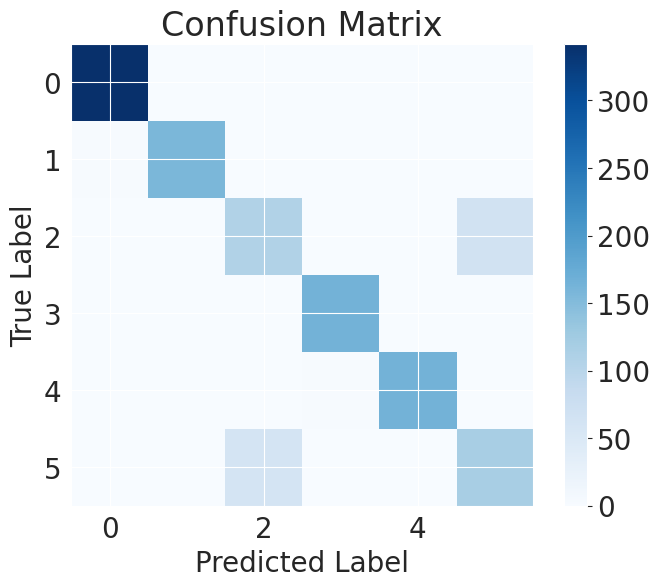

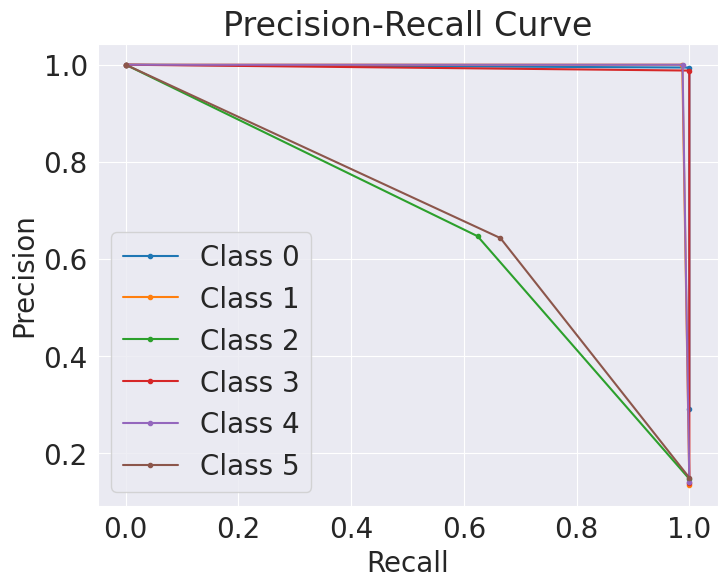

In [ ]:


# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Compute precision and recall for each class
precision = dict()
recall = dict()
for i in range(len(np.unique(y_test))):
    precision[i], recall[i], _ = precision_recall_curve(y_test == i, y_pred == i)

# Plot precision-recall curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y_test))):
    plt.plot(recall[i], precision[i], marker='.', label='Class {}'.format(i))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="best")
plt.show()




Feature Importance

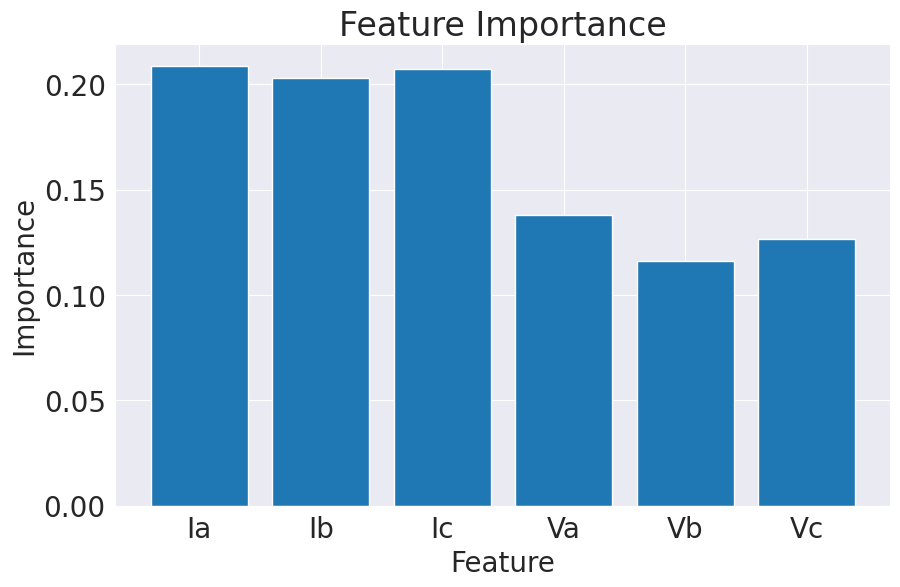

In [ ]:
# Investigate misclassifications
misclassified_indices = np.where(y_test != y_pred)[0]
misclassified_samples = X_test.to_numpy()[misclassified_indices]  # Convert DataFrame to NumPy array
true_labels = y_test[misclassified_indices]
predicted_labels = y_pred[misclassified_indices]


rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
feature_importances = rf_classifier.feature_importances_
feature_names = X_train.columns.tolist()

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances, align='center')
plt.xticks(range(len(feature_importances)), feature_names)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()


Normalized confusion matrix
[[1.         0.         0.         0.         0.         0.        ]
 [0.01257862 0.98742138 0.         0.         0.         0.        ]
 [0.         0.         0.62427746 0.         0.         0.37572254]
 [0.         0.         0.         1.         0.         0.        ]
 [0.         0.         0.         0.01204819 0.98795181 0.        ]
 [0.         0.         0.33522727 0.         0.         0.66477273]]


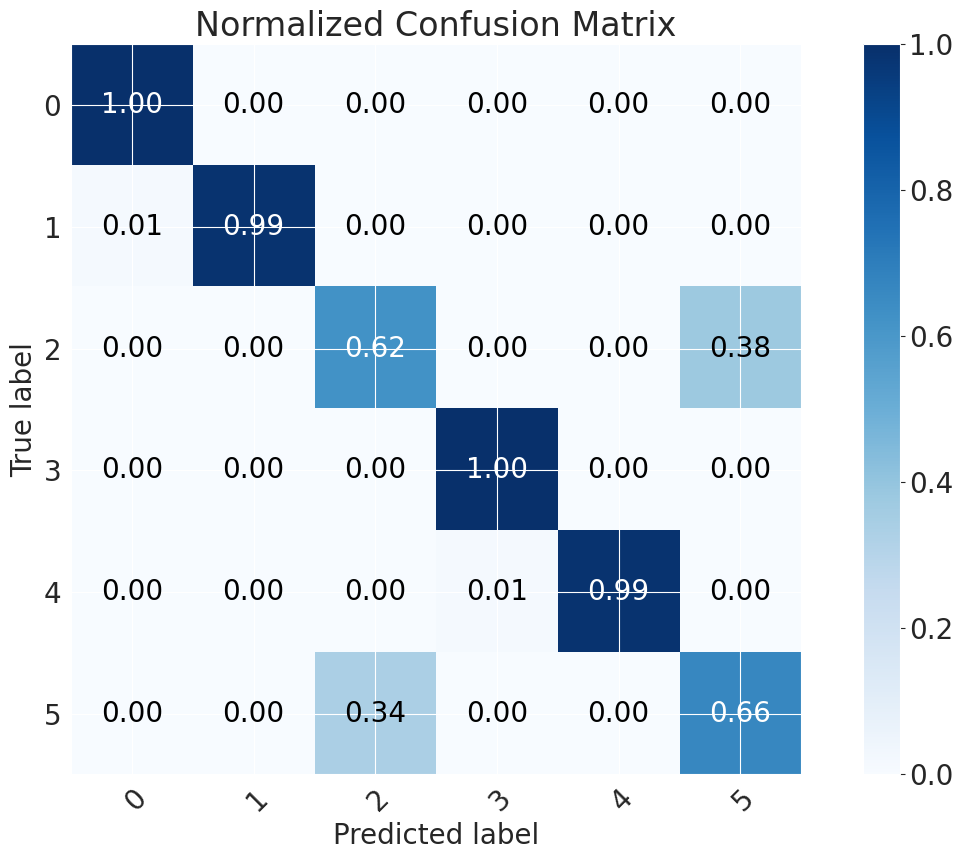

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc

# Define function for plotting confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # Print confusion matrix
    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")


    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=np.unique(y_test), normalize=True, title='Normalized Confusion Matrix')
plt.show()




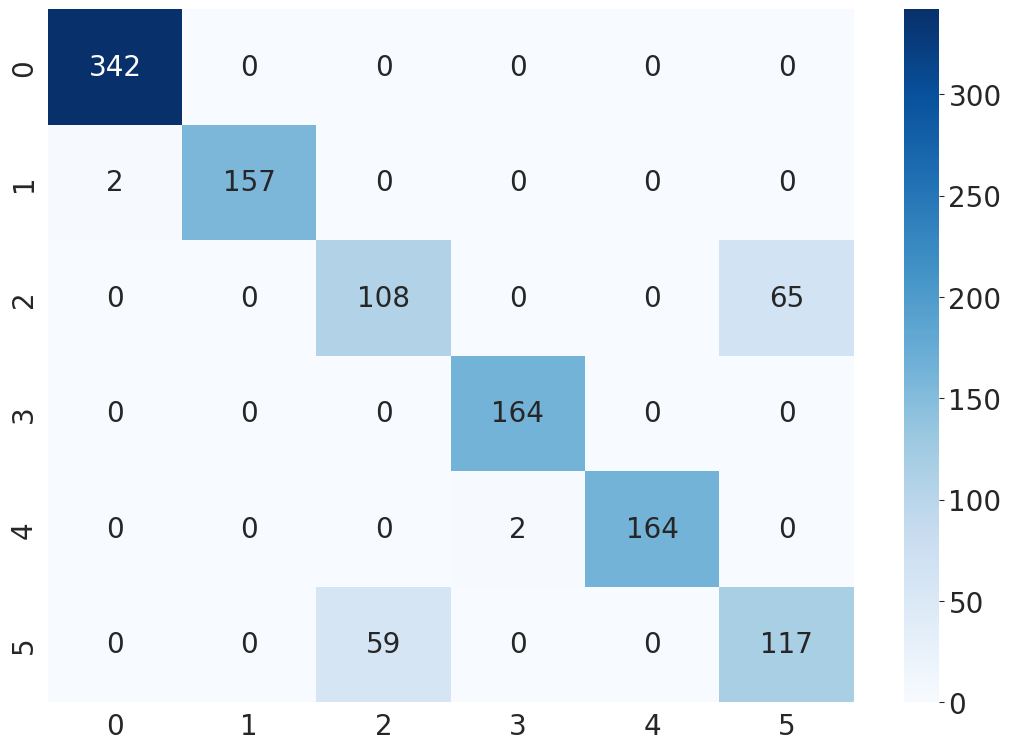

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='.4g')
plt.show()

In [ ]:
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)*100:.03f}%')

Accuracy Score: 89.153%


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       342
           1       1.00      0.99      0.99       159
           2       0.65      0.62      0.64       173
           3       0.99      1.00      0.99       164
           4       1.00      0.99      0.99       166
           5       0.64      0.66      0.65       176

    accuracy                           0.89      1180
   macro avg       0.88      0.88      0.88      1180
weighted avg       0.89      0.89      0.89      1180



In [ ]:
cr = classification_report(y_test, y_pred, output_dict=True)
cr.keys()

dict_keys(['0', '1', '2', '3', '4', '5', 'accuracy', 'macro avg', 'weighted avg'])

In [ ]:
f1_scores = {}
for key, val in cr.items():
    if key == 'accuracy':
        break
    class_name = le.inverse_transform([int(key)])[0]
    f1_scores[class_name] = val["f1-score"]
sorted(f1_scores.items(), key=lambda x: x[1], reverse=True)

[('0000', 0.9970845481049563),
 ('1001', 0.993939393939394),
 ('1011', 0.993939393939394),
 ('0110', 0.9936708860759493),
 ('1111', 0.653631284916201),
 ('0111', 0.6352941176470588)]

In [ ]:
f1_scores_df = pd.DataFrame({'class': f1_scores.keys(),
                             'f1': f1_scores.values()})
f1_scores_df

,class,f1
0,0000,0.997085
1,0110,0.993671
2,0111,0.635294
3,1001,0.993939
4,1011,0.993939
5,1111,0.653631


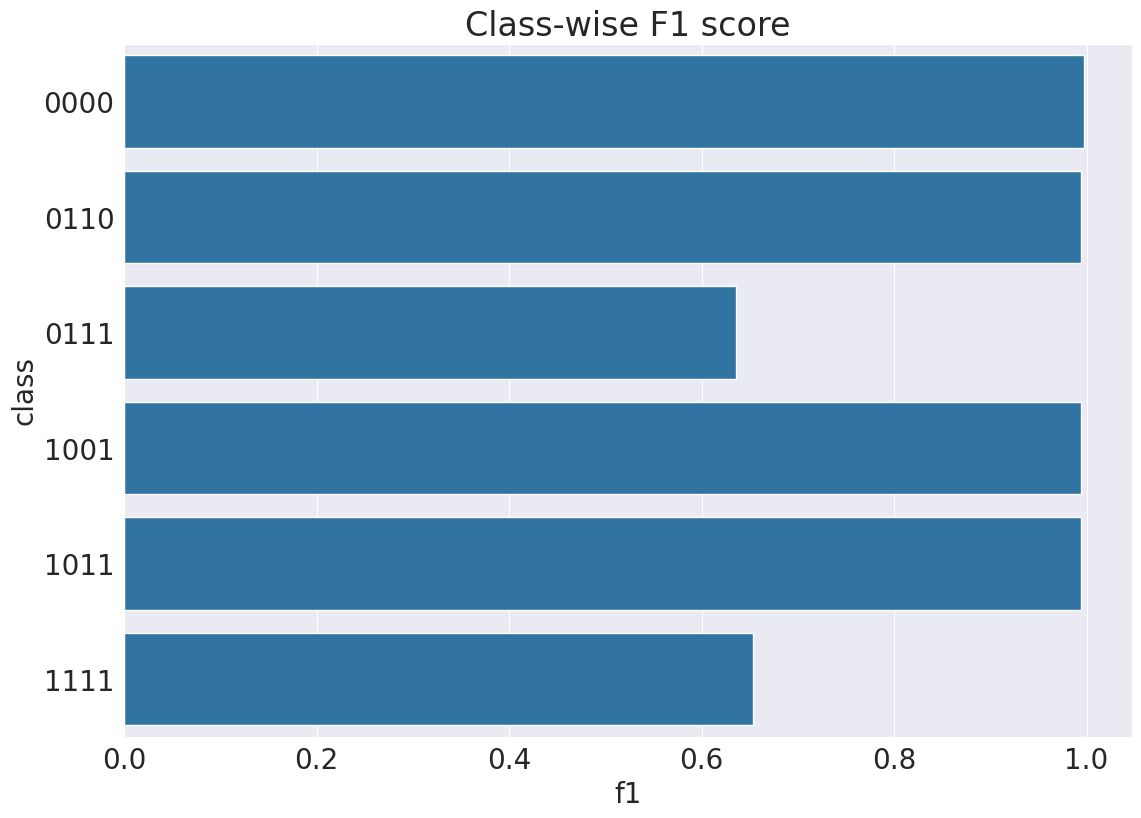

In [ ]:
sns.barplot(data=f1_scores_df, x='f1', y='class')
plt.title("Class-wise F1 score")
plt.show()